In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("netflix_titles.csv")

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
#Checking unique values in all the columns
for i in df.columns:
  print(i,':')
  print(df[i].unique())
  print(" ")

show_id :
['s1' 's2' 's3' ... 's8805' 's8806' 's8807']
 
type :
['Movie' 'TV Show']
 
title :
['Dick Johnson Is Dead' 'Blood & Water' 'Ganglands' ... 'Zombieland'
 'Zoom' 'Zubaan']
 
director :
['Kirsten Johnson' nan 'Julien Leclercq' ... 'Majid Al Ansari'
 'Peter Hewitt' 'Mozez Singh']
 
cast :
[nan
 'Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng'
 'Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera'
 ...
 'Jesse Eisenberg, Woody Harrelson, Emma Stone, Abigail Breslin, Amber Heard, Bill Murray, Derek Graf'
 'Tim Allen, Courteney Cox, Chevy Chase, Kate Mara, Ryan Newman, Michael Cassidy, Spencer Breslin, Rip Torn, Kevin Zegers'
 'Vicky K

In [6]:
#Dropping useless columns
df = df.drop(['cast'],axis=1)

In [7]:
#Checking if there are any null values
df.isna().sum()

show_id            0
type               0
title              0
director        2634
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [8]:
df['country'].unique()

array(['United States', 'South Africa', nan, 'India',
       'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia',
       'United Kingdom', 'Germany, Czech Republic', 'Mexico', 'Turkey',
       'Australia', 'United States, India, France', 'Finland',
       'China, Canada, United States',
       'South Africa, United States, Japan', 'Nigeria', 'Japan',
       'Spain, United States', 'France', 'Belgium',
       'United Kingdom, United States', 'United States, United Kingdom',
       'France, United States', 'South Korea', 'Spain',
       'United States, Singapore', 'United Kingdom, Australia, France',
       'United Kingdom, Australia, France, United States',
       'United States, Canada', 'Germany, United States',
       'South Africa, United States', 'United States, Mexico',
       'United States, Italy, France, Japan',
       'United States, Italy, Romania, United Kingdom',
       'Australia, United States', 'Argentina, Venezuela',
       'United States, United Kin

# Feature Engineering

In [9]:
country_lists = df['country'].str.split(', ')

# Add a new column 'genre_list' to the original DataFrame
df['country_list'] = country_lists

In [10]:
country_to_region = {
    'America': ['United States', 'Canada', 'Mexico', 'Brazil', 'Argentina', 'Chile'],
    'Europe': ['United Kingdom', 'Germany', 'France', 'Italy', 'Spain', 'Russia', 'Poland',
               'Netherlands', 'Belgium', 'Switzerland', 'Sweden', 'Norway', 'Denmark'],
    'Africa': ['South Africa', 'Nigeria', 'Ethiopia', 'Ghana', 'Kenya', 'Egypt', 'Morocco'],
    'Asia': ['India', 'China', 'Japan', 'South Korea', 'Singapore', 'Malaysia', 'Indonesia',
             'Philippines', 'Vietnam', 'Thailand', 'Taiwan'],
    'Oceania': ['Australia', 'New Zealand'],
    'Middle East': ['Turkey', 'Saudi Arabia', 'Iran', 'United Arab Emirates', 'Israel', 'Qatar']
}

def categorize_country(country_list):
    # Check if the input is a list, otherwise return 'Other'
    if isinstance(country_list, list):
        for country, region_list in country_to_region.items():
            if any(c in region_list for c in country_list):
                return country
    return 'Other'

# Create a new column based on the country groups
df['country_category'] = df['country_list'].apply(categorize_country)

In [11]:
df['country_category'].value_counts()

America        4229
Asia           1894
Europe         1158
Other          1030
Africa          245
Middle East     148
Oceania         103
Name: country_category, dtype: int64

In [12]:
df = df.drop(['country'],axis=1)

In [13]:
genre_lists = df['listed_in'].str.split(', ')

# Add a new column 'genre_list' to the original DataFrame
df['genre_list'] = genre_lists

In [14]:
for i in df['genre_list'].values:
  for j in i:
    print(j)

Documentaries
International TV Shows
TV Dramas
TV Mysteries
Crime TV Shows
International TV Shows
TV Action & Adventure
Docuseries
Reality TV
International TV Shows
Romantic TV Shows
TV Comedies
TV Dramas
TV Horror
TV Mysteries
Children & Family Movies
Dramas
Independent Movies
International Movies
British TV Shows
Reality TV
Comedies
Dramas
Crime TV Shows
Docuseries
International TV Shows
Crime TV Shows
International TV Shows
TV Action & Adventure
Dramas
International Movies
Children & Family Movies
Comedies
British TV Shows
Crime TV Shows
Docuseries
TV Comedies
TV Dramas
Documentaries
International Movies
Crime TV Shows
Spanish-Language TV Shows
TV Dramas
Thrillers
International TV Shows
Spanish-Language TV Shows
TV Action & Adventure
Crime TV Shows
Docuseries
International TV Shows
International TV Shows
TV Action & Adventure
TV Dramas
Comedies
International Movies
Children & Family Movies
Comedies
International Movies
Romantic Movies
Docuseries
International TV Shows
Reality TV
Com

In [15]:
genre_groups = {
    'Movies & TV Shows': ['Movies', 'TV Shows'],
    'TV Genres': ['TV Comedies', 'TV Dramas', 'TV Horror', 'TV Mysteries', 'TV Sci-Fi & Fantasy',
                  'TV Thrillers', 'TV Action & Adventure', 'Stand-Up Comedy & Talk Shows', 'Reality TV',
                  'Teen TV Shows', 'Kids\' TV', 'British TV Shows', 'Korean TV Shows',
                  'Spanish-Language TV Shows', 'International TV Shows', 'Docuseries'],
    'Movies by Genre': ['Action & Adventure', 'Anime Features', 'Anime Series', 'Children & Family Movies',
                        'Classic Movies', 'Comedies', 'Crime TV Shows', 'Cult Movies', 'Documentaries',
                        'Dramas', 'Faith & Spirituality', 'Horror Movies', 'Independent Movies',
                        'International Movies', 'LGBTQ Movies', 'Music & Musicals', 'Romantic Movies',
                        'Sci-Fi & Fantasy', 'Science & Nature TV', 'Sports Movies', 'Stand-Up Comedy',
                        'Thrillers', 'Classic & Cult TV']
}

category_counts = {category: 0 for category in genre_groups}

for genres in df['genre_list'].values:
    for genre in genres:
        for category, category_genres in genre_groups.items():
            if genre in category_genres:
                category_counts[category] += 1
                break  # Break out of the inner loop once the genre is found in a category

# Print out the counts for each category
for category, count in category_counts.items():
    print(f"{category}: {count}")


Movies & TV Shows: 73
TV Genres: 4981
Movies by Genre: 13899


In [16]:
genre_groups = {
    'Comedy & Entertainment': ['TV Comedies', 'Stand-Up Comedy & Talk Shows', 'Stand-Up Comedy', 'Music & Musicals','Movies','TV Shows'],
    'Drama,Horror,Thiller': ['TV Horror', 'Horror Movies', 'Mystery & Crime','TV Dramas','TV Thrillers','Thrillers','Dramas'],
    'Sci-Fi, Fantasy & Adventure': ['TV Sci-Fi & Fantasy', 'Sci-Fi & Fantasy', 'Science & Nature TV',
                                     'TV Action & Adventure', 'Action & Adventure'],
    'Reality & Lifestyle': ['Reality TV', 'Docuseries','Teen TV Shows','Kids\' TV','Children & Family Movies'],
    'International & Cultural': ['British TV Shows', 'Korean TV Shows', 'Spanish-Language TV Shows',
                                 'International TV Shows', 'International Movies','Classic Movies','Classic & Cult TV'],
    'Anime & Animation': ['Anime Features', 'Anime Series'],
    'Romance & Independent': ['Romantic Movies', 'Independent Movies', 'Cult Movies'],
    'Documentaries & Faith': ['Documentaries', 'Faith & Spirituality','LGBTQ Movies']
}

# Function to categorize genres
def categorize_genres(genres):
    for category, category_genres in genre_groups.items():
        if any(genre in category_genres for genre in genres):
            return category
    return 'Other'  # In case a genre doesn't fit any category

# Create a new column based on the genre groups
df['genre_category'] = df['genre_list'].apply(categorize_genres)

In [17]:
df = df.drop('genre_list',axis=1)

In [18]:
df = df.drop('country_list',axis=1)

In [19]:
df.head()

,show_id,type,title,director,date_added,release_year,rating,duration,listed_in,description,country_category,genre_category
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",America,Documentaries & Faith
1,s2,TV Show,Blood & Water,NaN,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Africa,"Drama,Horror,Thiller"
2,s3,TV Show,Ganglands,Julien Leclercq,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Other,"Sci-Fi, Fantasy & Adventure"
3,s4,TV Show,Jailbirds New Orleans,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Other,Reality & Lifestyle
4,s5,TV Show,Kota Factory,NaN,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Asia,Comedy & Entertainment


In [20]:
df['duration'].unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

In [21]:
df['Movie Duration'] = df[df['type'] == 'Movie']['duration'].str.extract(r'(\d+) min').astype(float)
df['TV Show Seasons'] = df[df['type'] == 'TV Show']['duration'].str.extract(r'(\d+) Seasons').astype(float)

In [22]:
df.head()

,show_id,type,title,director,date_added,release_year,rating,duration,listed_in,description,country_category,genre_category,Movie Duration,TV Show Seasons
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",America,Documentaries & Faith,90.0,NaN
1,s2,TV Show,Blood & Water,NaN,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Africa,"Drama,Horror,Thiller",NaN,2.0
2,s3,TV Show,Ganglands,Julien Leclercq,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Other,"Sci-Fi, Fantasy & Adventure",NaN,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Other,Reality & Lifestyle,NaN,NaN
4,s5,TV Show,Kota Factory,NaN,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Asia,Comedy & Entertainment,NaN,2.0


In [23]:
df['Movie Duration'].fillna(0, inplace=True)
df['TV Show Seasons'].fillna(0, inplace=True)

In [24]:
df.head(5)

,show_id,type,title,director,date_added,release_year,rating,duration,listed_in,description,country_category,genre_category,Movie Duration,TV Show Seasons
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",America,Documentaries & Faith,90.0,0.0
1,s2,TV Show,Blood & Water,NaN,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",Africa,"Drama,Horror,Thiller",0.0,2.0
2,s3,TV Show,Ganglands,Julien Leclercq,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,Other,"Sci-Fi, Fantasy & Adventure",0.0,0.0
3,s4,TV Show,Jailbirds New Orleans,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",Other,Reality & Lifestyle,0.0,0.0
4,s5,TV Show,Kota Factory,NaN,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,Asia,Comedy & Entertainment,0.0,2.0


In [25]:
df = df.drop(['duration','listed_in'],axis=1)

In [26]:
df.head()

,show_id,type,title,director,date_added,release_year,rating,description,country_category,genre_category,Movie Duration,TV Show Seasons
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"September 25, 2021",2020,PG-13,"As her father nears the end of his life, filmm...",America,Documentaries & Faith,90.0,0.0
1,s2,TV Show,Blood & Water,NaN,"September 24, 2021",2021,TV-MA,"After crossing paths at a party, a Cape Town t...",Africa,"Drama,Horror,Thiller",0.0,2.0
2,s3,TV Show,Ganglands,Julien Leclercq,"September 24, 2021",2021,TV-MA,To protect his family from a powerful drug lor...,Other,"Sci-Fi, Fantasy & Adventure",0.0,0.0
3,s4,TV Show,Jailbirds New Orleans,NaN,"September 24, 2021",2021,TV-MA,"Feuds, flirtations and toilet talk go down amo...",Other,Reality & Lifestyle,0.0,0.0
4,s5,TV Show,Kota Factory,NaN,"September 24, 2021",2021,TV-MA,In a city of coaching centers known to train I...,Asia,Comedy & Entertainment,0.0,2.0


In [27]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [28]:
ratings_meaning = {
    'MPAA Ratings (Movies)': ['G', 'PG', 'PG-13', 'R', 'NC-17'],
    'TV Parental Guidelines (TV Shows)': ['TV-Y', 'TV-Y7', 'TV-Y7-FV', 'TV-G', 'TV-PG', 'TV-14', 'TV-MA'],
}

# Function to categorize ratings
def categorize_ratings(rating):
    if isinstance(rating, float):
        return 'Other'  # Return 'Other' for float values (NaNs)

    for category, category_ratings in ratings_meaning.items():
        if rating in category_ratings:
            return category

    return 'Other'  # In case a rating doesn't fit any category

# Create a new column based on the rating groups
df['ratings_category'] = df['rating'].apply(categorize_ratings)

In [29]:
df.head()

,show_id,type,title,director,date_added,release_year,rating,description,country_category,genre_category,Movie Duration,TV Show Seasons,ratings_category
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"September 25, 2021",2020,PG-13,"As her father nears the end of his life, filmm...",America,Documentaries & Faith,90.0,0.0,MPAA Ratings (Movies)
1,s2,TV Show,Blood & Water,NaN,"September 24, 2021",2021,TV-MA,"After crossing paths at a party, a Cape Town t...",Africa,"Drama,Horror,Thiller",0.0,2.0,TV Parental Guidelines (TV Shows)
2,s3,TV Show,Ganglands,Julien Leclercq,"September 24, 2021",2021,TV-MA,To protect his family from a powerful drug lor...,Other,"Sci-Fi, Fantasy & Adventure",0.0,0.0,TV Parental Guidelines (TV Shows)
3,s4,TV Show,Jailbirds New Orleans,NaN,"September 24, 2021",2021,TV-MA,"Feuds, flirtations and toilet talk go down amo...",Other,Reality & Lifestyle,0.0,0.0,TV Parental Guidelines (TV Shows)
4,s5,TV Show,Kota Factory,NaN,"September 24, 2021",2021,TV-MA,In a city of coaching centers known to train I...,Asia,Comedy & Entertainment,0.0,2.0,TV Parental Guidelines (TV Shows)


In [31]:
df['ratings_category'].value_counts()

TV Parental Guidelines (TV Shows)    7097
MPAA Ratings (Movies)                1620
Other                                  90
Name: ratings_category, dtype: int64

In [32]:
df = df.drop(['rating'],axis=1)

In [33]:
df.head()

,show_id,type,title,director,date_added,release_year,description,country_category,genre_category,Movie Duration,TV Show Seasons,ratings_category
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"September 25, 2021",2020,"As her father nears the end of his life, filmm...",America,Documentaries & Faith,90.0,0.0,MPAA Ratings (Movies)
1,s2,TV Show,Blood & Water,NaN,"September 24, 2021",2021,"After crossing paths at a party, a Cape Town t...",Africa,"Drama,Horror,Thiller",0.0,2.0,TV Parental Guidelines (TV Shows)
2,s3,TV Show,Ganglands,Julien Leclercq,"September 24, 2021",2021,To protect his family from a powerful drug lor...,Other,"Sci-Fi, Fantasy & Adventure",0.0,0.0,TV Parental Guidelines (TV Shows)
3,s4,TV Show,Jailbirds New Orleans,NaN,"September 24, 2021",2021,"Feuds, flirtations and toilet talk go down amo...",Other,Reality & Lifestyle,0.0,0.0,TV Parental Guidelines (TV Shows)
4,s5,TV Show,Kota Factory,NaN,"September 24, 2021",2021,In a city of coaching centers known to train I...,Asia,Comedy & Entertainment,0.0,2.0,TV Parental Guidelines (TV Shows)


# WEB SCRAPING

In [34]:
import requests

# Your TMDb API key
api_key = '8243eb447e631f1a86e61c3a7e7cdf80'

# Dictionary to store TMDb IDs corresponding to TV show titles
tmdb_show_ids = {}

# Iterate through each TV show or movie in your dataset with null values in the "director" column
for index, row in df[df['director'].isnull()].iterrows():
    # Extract the title of the TV show or movie
    show_title = row['title']
    # Make a request to TMDb's API to search for the TV show or movie by its title
    response = requests.get(f'https://api.themoviedb.org/3/search/tv?api_key={api_key}&query={show_title}')
    if response.status_code == 200:
        # Convert the response data to JSON format
        tv_show_data = response.json()
        # Check if any TV shows or movies were found
        if tv_show_data['total_results'] > 0:
            # Extract the TMDb ID of the first result
            tmdb_id = tv_show_data['results'][0]['id']
            # Store the TMDb ID corresponding to the TV show or movie title
            tmdb_show_ids[show_title] = tmdb_id
            print(f"TMDb ID found for '{show_title}': {tmdb_id}")
            # Fetch the director's name from TMDb using the TMDb ID
            response_director = requests.get(f'https://api.themoviedb.org/3/tv/{tmdb_id}?api_key={api_key}')
            if response_director.status_code == 200:
                # Convert the response data to JSON format
                tv_show_details = response_director.json()
                # Extract the director's name from the response
                director_name = ', '.join([crew['name'] for crew in tv_show_details.get('created_by', [])])
                # Fill the "director" column in your dataset with the retrieved director's name
                df.at[index, 'director'] = director_name
                print(f"Director name found for '{show_title}': {director_name}")
            else:
                print(f"Failed to fetch director data for TV show or movie '{show_title}' with TMDb ID '{tmdb_id}'")
        else:
            print(f"No results found for TV show or movie '{show_title}'")
    else:
        print(f"Failed to fetch data for TV show or movie '{show_title}'")

# Print the dictionary containing TMDb IDs corresponding to TV show or movie titles
print("TMDb IDs for TV shows or movies in your dataset:")
print(tmdb_show_ids)


TMDb ID found for 'Blood & Water': 219290
Director name found for 'Blood & Water': 
TMDb ID found for 'Jailbirds New Orleans': 134678
Director name found for 'Jailbirds New Orleans': 
TMDb ID found for 'Kota Factory': 89113
Director name found for 'Kota Factory': Saurabh Khanna
TMDb ID found for 'Vendetta: Truth, Lies and The Mafia': 132013
Director name found for 'Vendetta: Truth, Lies and The Mafia': Ruggero Di Maggio
TMDb ID found for 'Crime Stories: India Detectives': 132583
Director name found for 'Crime Stories: India Detectives': 
TMDb ID found for 'Dear White People': 70767
Director name found for 'Dear White People': Justin Simien
TMDb ID found for 'Falsa identidad': 82809
Director name found for 'Falsa identidad': Perla Farías
TMDb ID found for 'Jaguar': 127425
Director name found for 'Jaguar': Carlos Sedes, Ramón Campos, Gema R. Neira
TMDb ID found for 'Resurrection: Ertugrul': 66017
Director name found for 'Resurrection: Ertugrul': Mehmet Bozdağ
TMDb ID found for 'Love on t

TMDb ID found for 'Rascal Does Not Dream of Bunny Girl Senpai': 82739
Director name found for 'Rascal Does Not Dream of Bunny Girl Senpai': 
TMDb ID found for 'The Creative Indians': 196071
Director name found for 'The Creative Indians': Manil Gupta, Rohit Gupta
TMDb ID found for 'Winx Club': 1848
Director name found for 'Winx Club': Iginio Straffi
TMDb ID found for 'Brand New Cherry Flavor': 129418
Director name found for 'Brand New Cherry Flavor': Nick Antosca, Lenore Zion
TMDb ID found for 'Fast & Furious Spy Racers': 63157
Director name found for 'Fast & Furious Spy Racers': Chris Prynoski
TMDb ID found for 'Grace and Frankie': 62320
Director name found for 'Grace and Frankie': Howard J. Morris, Marta Kauffman
TMDb ID found for 'The Kingdom': 63333
Director name found for 'The Kingdom': Stephen Butchard
TMDb ID found for 'AlRawabi School for Girls': 88516
Director name found for 'AlRawabi School for Girls': 
TMDb ID found for 'Bake Squad': 129674
Director name found for 'Bake Squad

TMDb ID found for 'Good Morning Call': 65693
Director name found for 'Good Morning Call': Yue Takasuka
TMDb ID found for 'I AM A KILLER': 81337
Director name found for 'I AM A KILLER': Franckie Williams, Romaine Chapman
TMDb ID found for 'I Think You Should Leave with Tim Robinson': 88728
Director name found for 'I Think You Should Leave with Tim Robinson': Zach Kanin, Tim Robinson
TMDb ID found for 'Kim's Convenience': 68106
Director name found for 'Kim's Convenience': Ins Choi, Kevin White
TMDb ID found for 'Larva': 80281
Director name found for 'Larva': 
TMDb ID found for 'Marcella': 66023
Director name found for 'Marcella': Hans Rosenfeldt
TMDb ID found for 'Midnight Diner: Tokyo Stories': 92408
Director name found for 'Midnight Diner: Tokyo Stories': Jōji Matsuoka, Nobuhiro Yamashita
TMDb ID found for 'My Little Pony: Friendship Is Magic': 33765
Director name found for 'My Little Pony: Friendship Is Magic': Lauren Faust
TMDb ID found for 'Orange Is the New Black': 1424
Director na

Director name found for 'Beyond Evil': Kim Soo-jin, Sim Na-yeon
TMDb ID found for 'Elite Short Stories: Nadia Guzmán': 126526
Director name found for 'Elite Short Stories: Nadia Guzmán': 
No results found for TV show or movie 'Headspace: Unwind Your Mind'
TMDb ID found for 'Power Rangers Dino Fury': 2328
Director name found for 'Power Rangers Dino Fury': Shuki Levy, Haim Saban
TMDb ID found for 'Rhyme Time Town': 105034
Director name found for 'Rhyme Time Town': 
TMDb ID found for 'Elite Short Stories: Guzmán Caye Rebe': 126531
Director name found for 'Elite Short Stories: Guzmán Caye Rebe': 
TMDb ID found for 'Bling Empire - The Afterparty': 115549
Director name found for 'Bling Empire - The Afterparty': 
TMDb ID found for 'Cobra Kai - The Afterparty': 115549
Director name found for 'Cobra Kai - The Afterparty': 
TMDb ID found for 'Love (ft. Marriage and Divorce)': 116041
Director name found for 'Love (ft. Marriage and Divorce)': Im Sung-han
TMDb ID found for 'To All the Boys: Always 

No results found for TV show or movie 'Free to Play'
TMDb ID found for 'Luis Miguel - The Series': 79008
Director name found for 'Luis Miguel - The Series': 
TMDb ID found for 'PJ Masks': 65417
Director name found for 'PJ Masks': Romuald Racioppo
TMDb ID found for 'Bakugan: Geogan Rising': 87247
Director name found for 'Bakugan: Geogan Rising': Joe Kelly, Duncan Rouleau, Steven T. Seagle, Joe Casey
No results found for TV show or movie 'Dad Stop Embarrassing Me - The Afterparty'
TMDb ID found for 'Love Naggers': 100064
Director name found for 'Love Naggers': 
TMDb ID found for 'Dancing Angels': 231357
Director name found for 'Dancing Angels': 
TMDb ID found for 'Durarara!!': 42410
Director name found for 'Durarara!!': 
TMDb ID found for 'Gilmore Girls': 4586
Director name found for 'Gilmore Girls': Amy Sherman-Palladino
TMDb ID found for 'High-Rise Invasion': 112163
Director name found for 'High-Rise Invasion': 
TMDb ID found for 'Next in Fashion': 98805
Director name found for 'Next i

TMDb ID found for 'Zindagi in Short': 119408
Director name found for 'Zindagi in Short': 
TMDb ID found for 'Vincenzo': 117376
Director name found for 'Vincenzo': 
No results found for TV show or movie 'Fate: The Winx Saga - The Afterparty'
TMDb ID found for 'Tribes of Europa': 93808
Director name found for 'Tribes of Europa': Philip Koch
TMDb ID found for 'Hello, Me!': 116045
Director name found for 'Hello, Me!': 
TMDb ID found for 'Sisyphus': 113622
Director name found for 'Sisyphus': 
TMDb ID found for 'Thus Spoke Kishibe Rohan': 118443
Director name found for 'Thus Spoke Kishibe Rohan': 
TMDb ID found for 'Amend: The Fight for America': 118043
Director name found for 'Amend: The Fight for America': Tom Yellin, Robe Imbriano
TMDb ID found for 'Behind Her Eyes': 97173
Director name found for 'Behind Her Eyes': Steve Lightfoot
TMDb ID found for 'MeatEater': 46504
Director name found for 'MeatEater': 
TMDb ID found for 'Good Girls': 71715
Director name found for 'Good Girls': Jenna Ban

TMDb ID found for 'Diamond City': 115034
Director name found for 'Diamond City': 
TMDb ID found for 'Home for Christmas': 95612
Director name found for 'Home for Christmas': Per-Olav Sørensen
No results found for TV show or movie 'Ma Rainey's Black Bottom: A Legacy Brought to Screen'
TMDb ID found for 'Morphle': 112454
Director name found for 'Morphle': 
TMDb ID found for 'Run On': 33238
Director name found for 'Run On': Jo Hyo-jin, Kim Joo-hyung, Lim Hyung-taek
TMDb ID found for 'How To Ruin Christmas': 114649
Director name found for 'How To Ruin Christmas': Rethabile Ramaphakela, Katleho Ramaphakela
TMDb ID found for 'Marvel Anime: Wolverine': 38247
Director name found for 'Marvel Anime: Wolverine': 
TMDb ID found for 'Marvel Anime: X-Men': 43146
Director name found for 'Marvel Anime: X-Men': 
TMDb ID found for 'Black Ink Crew New York': 58796
Director name found for 'Black Ink Crew New York': 
TMDb ID found for 'Pup Academy': 93265
Director name found for 'Pup Academy': Anna McRober

Director name found for 'Wrong Kind of Black': Boori Monty Pryor, Nick Musgrove
TMDb ID found for 'Paranormal': 8884
Director name found for 'Paranormal': 
No results found for TV show or movie 'A Christmas Catch'
TMDb ID found for 'Love & Anarchy': 242551
Director name found for 'Love & Anarchy': 
No results found for TV show or movie 'Ya no estoy aquí: Una conversación entre Guillermo del Toro y Alfonso Cuarón'
TMDb ID found for 'Can You Hear Me?': 85789
Director name found for 'Can You Hear Me?': 
TMDb ID found for '60 Days In': 65854
Director name found for '60 Days In': Greg Henry
TMDb ID found for 'Dawson's Creek': 2327
Director name found for 'Dawson's Creek': Kevin Williamson
TMDb ID found for 'Forged in Fire': 62884
Director name found for 'Forged in Fire': 
TMDb ID found for 'Leah Remini: Scientology and the Aftermath': 68901
Director name found for 'Leah Remini: Scientology and the Aftermath': Leah Remini
TMDb ID found for 'LEGO Jurassic World: Legend of Isla Nublar': 93895


TMDb ID found for 'The Chef Show': 89557
Director name found for 'The Chef Show': 
TMDb ID found for 'The Playbook': 110193
Director name found for 'The Playbook': Josh Greenbaum, John Henion
TMDb ID found for 'Fukrey Boyzzz': 219676
Director name found for 'Fukrey Boyzzz': 
TMDb ID found for 'Ratched': 81354
Director name found for 'Ratched': Evan Romansky
TMDb ID found for 'The American Barbecue Showdown': 109819
Director name found for 'The American Barbecue Showdown': Daniel Calin
TMDb ID found for 'The Blacklist': 46952
Director name found for 'The Blacklist': Jon Bokenkamp
TMDb ID found for 'Dragon's Dogma': 99769
Director name found for 'Dragon's Dogma': 
TMDb ID found for 'The Last Word': 110152
Director name found for 'The Last Word': Aron Lehmann, Carlos V. Irmscher
TMDb ID found for 'Baby': 82700
Director name found for 'Baby': Andrea De Sica, Giacomo Mazzariol, Antonio Le Fosse, Marco Raspanti, Eleonora Trucchi, Romolo Re Salvador
TMDb ID found for 'Challenger': 90769
Direc

TMDb ID found for 'The Next Step': 62404
Director name found for 'The Next Step': Frank Van Keeken
TMDb ID found for 'Toradora!': 42916
Director name found for 'Toradora!': 
TMDb ID found for 'Transformers Rescue Bots Academy': 85521
Director name found for 'Transformers Rescue Bots Academy': 
TMDb ID found for 'Get Even': 99335
Director name found for 'Get Even': Holly Phillips
TMDb ID found for 'Sugar Rush': 80341
Director name found for 'Sugar Rush': 
TMDb ID found for 'The Umbrella Academy': 75006
Director name found for 'The Umbrella Academy': Steve Blackman
TMDb ID found for 'Transformers: War For Cybertron Trilogy': 117682
Director name found for 'Transformers: War For Cybertron Trilogy': 
TMDb ID found for 'Last Chance U': 67027
Director name found for 'Last Chance U': Greg Whiteley
TMDb ID found for 'Shameless (U.S.)': 34307
Director name found for 'Shameless (U.S.)': John Wells, Paul Abbott
TMDb ID found for 'Sing On! Spain': 105844
Director name found for 'Sing On! Spain': 


TMDb ID found for 'My Shy Boss': 69205
Director name found for 'My Shy Boss': Joo Hwa-mi
TMDb ID found for 'Revolutionary Love': 74075
Director name found for 'Revolutionary Love': Kang Eun-kyung
TMDb ID found for 'Space Force': 85922
Director name found for 'Space Force': Steve Carell, Greg Daniels
TMDb ID found for 'Can't Cope, Won't Cope': 68329
Director name found for 'Can't Cope, Won't Cope': Stefanie Preissner
TMDb ID found for 'Dorohedoro': 94404
Director name found for 'Dorohedoro': 
TMDb ID found for 'Mako Mermaids: An H2O Adventure': 42025
Director name found for 'Mako Mermaids: An H2O Adventure': Jonathan M. Shiff
TMDb ID found for 'Betaal': 103759
Director name found for 'Betaal': Patrick Graham
TMDb ID found for 'Dynasty': 3769
Director name found for 'Dynasty': Esther Shapiro, Richard Alan Shapiro
TMDb ID found for 'History 101': 102905
Director name found for 'History 101': 
TMDb ID found for 'Mystic Pop-up Bar': 99491
Director name found for 'Mystic Pop-up Bar': Bae Hye

Director name found for 'Saint Seiya': 
TMDb ID found for 'Sunderland 'Til I Die': 84777
Director name found for 'Sunderland 'Til I Die': 
TMDb ID found for 'The Iliza Shlesinger Sketch Show': 101255
Director name found for 'The Iliza Shlesinger Sketch Show': 
TMDb ID found for 'The Windsors': 66437
Director name found for 'The Windsors': George Jeffrie, Bert Tyler-Moore
TMDb ID found for 'Well-Intended Love': 86605
Director name found for 'Well-Intended Love': Chun Feng Yi Du
TMDb ID found for 'Akbar Birbal': 112397
Director name found for 'Akbar Birbal': 
No results found for TV show or movie 'Dave Chappelle: The Kennedy Center Mark Twain Prize for American Humor'
No results found for TV show or movie 'Tree House Tales'
TMDb ID found for 'Rugal': 97766
Director name found for 'Rugal': Do Hyun-joo, Rilmae
TMDb ID found for 'Happy!': 45886
Director name found for 'Happy!': Michael G. Moye, Ron Leavitt
TMDb ID found for 'Ladies Up': 101090
Director name found for 'Ladies Up': 
TMDb ID f

Director name found for 'Diablero': José Manuel Cravioto, Pablo Tébar
TMDb ID found for 'Luna Nera': 96346
Director name found for 'Luna Nera': Laura Paolucci, Francesca Manieri, Tiziana Triana
TMDb ID found for 'Unauthorized Living': 82516
Director name found for 'Unauthorized Living': Aitor Gabilondo
TMDb ID found for 'Ainori Love Wagon: African Journey': 102496
Director name found for 'Ainori Love Wagon: African Journey': 
TMDb ID found for 'THE STRANGER': 96608
Director name found for 'THE STRANGER': Harlan Coben
TMDb ID found for 'What the Love! with Karan Johar': 98855
Director name found for 'What the Love! with Karan Johar': 
TMDb ID found for 'Find Yourself': 98830
Director name found for 'Find Yourself': 
TMDb ID found for 'Night on Earth': 97861
Director name found for 'Night on Earth': 
TMDb ID found for 'Omniscient': 98510
Director name found for 'Omniscient': Pedro Aguilera
TMDb ID found for 'Rise of Empires: Ottoman': 96481
Director name found for 'Rise of Empires: Ottom

Director name found for 'Three Days of Christmas': Pau Freixas, Clara Esparrach
TMDb ID found for 'Triad Princess': 96049
Director name found for 'Triad Princess': Neal Wu
No results found for TV show or movie 'The Irishman: In Conversation'
TMDb ID found for 'V Wars': 81559
Director name found for 'V Wars': Glenn Davis, William Laurin
TMDb ID found for 'The Last O.G.': 77485
Director name found for 'The Last O.G.': Jordan Peele, John Carcieri
TMDb ID found for 'The Prince of Tennis ~ Match! Tennis Juniors ~': 96130
Director name found for 'The Prince of Tennis ~ Match! Tennis Juniors ~': 
TMDb ID found for 'The Road to Love': 96532
Director name found for 'The Road to Love': 
TMDb ID found for 'Nightflyers': 78183
Director name found for 'Nightflyers': Jeff Buhler
TMDb ID found for 'Eastsiders': 67202
Director name found for 'Eastsiders': Kit Williamson
No results found for TV show or movie 'Lakeeran'
TMDb ID found for 'Space Jungle': 213286
Director name found for 'Space Jungle': 
TM

TMDb ID found for 'Shine On with Reese': 80960
Director name found for 'Shine On with Reese': 
No results found for TV show or movie 'The Road to El Camino: Behind the Scenes of El Camino: A Breaking Bad Movie'
TMDb ID found for 'Wait, My Youth': 48245
Director name found for 'Wait, My Youth': Shen Qinyuan
TMDb ID found for 'A Little Thing Called First Love': 95100
Director name found for 'A Little Thing Called First Love': 
TMDb ID found for 'BoJack Horseman': 61222
Director name found for 'BoJack Horseman': Raphael Bob-Waksberg
TMDb ID found for 'Brotherhood': 2204
Director name found for 'Brotherhood': Blake Masters
TMDb ID found for 'Drug Squad: Costa del Sol': 89171
Director name found for 'Drug Squad: Costa del Sol': 
TMDb ID found for 'Monzón: A Knockout Blow': 90614
Director name found for 'Monzón: A Knockout Blow': Pablo E. Bossi
TMDb ID found for 'Nailed It! France': 94913
Director name found for 'Nailed It! France': 
TMDb ID found for 'Nailed It! Spain': 94884
Director name 

TMDb ID found for 'Million Pound Menu': 81660
Director name found for 'Million Pound Menu': Fred Sirieix
TMDb ID found for '13 Reasons Why: Beyond the Reasons': 80865
Director name found for '13 Reasons Why: Beyond the Reasons': 
TMDb ID found for 'HERO MASK': 84646
Director name found for 'HERO MASK': 
TMDb ID found for 'Hyperdrive': 91766
Director name found for 'Hyperdrive': Charlize Theron, Aaron Catling
No results found for TV show or movie 'Our Planet - Behind The Scenes'
TMDb ID found for '45 rpm': 83931
Director name found for '45 rpm': Ramón Campos, Gema R. Neira
No results found for TV show or movie 'Apache: The Life of Carlos Tevez'
TMDb ID found for 'Better Than Us': 84380
Director name found for 'Better Than Us': 
TMDb ID found for 'Diagnosis': 91701
Director name found for 'Diagnosis': 
TMDb ID found for 'Green Frontier': 91699
Director name found for 'Green Frontier': Mauricio Leiva-Cock, Diego Ramírez Schrempp, Jenny Ceballos
No results found for TV show or movie 'Invad

TMDb ID found for 'The Casketeers': 84181
Director name found for 'The Casketeers': Annabelle Lee-Harris
TMDb ID found for 'The Confession Tapes': 73792
Director name found for 'The Confession Tapes': Kelly Loudenberg
TMDb ID found for 'Fate/Zero': 45845
Director name found for 'Fate/Zero': Gen Urobuchi
TMDb ID found for 'Kill la Kill': 60728
Director name found for 'Kill la Kill': 
TMDb ID found for 'Puella Magi Madoka Magica': 94523
Director name found for 'Puella Magi Madoka Magica': 
TMDb ID found for 'Somewhere Only We Know': 86074
Director name found for 'Somewhere Only We Know': Mu Fusheng
TMDb ID found for 'Unit 42': 72429
Director name found for 'Unit 42': Julie Bertrand, Annie Carels, Charlotte Joulia, Michaël Erpeling, Danitza Athanassiadis
TMDb ID found for 'Awake: The Million Dollar Game': 90295
Director name found for 'Awake: The Million Dollar Game': 
TMDb ID found for 'Black Spot': 70613
Director name found for 'Black Spot': Mathieu Missoffe
TMDb ID found for 'El descon

TMDb ID found for 'Huge in France': 87799
Director name found for 'Huge in France': 
TMDb ID found for 'New Girl': 1420
Director name found for 'New Girl': Elizabeth Meriwether
TMDb ID found for 'You vs. Wild': 87712
Director name found for 'You vs. Wild': 
TMDb ID found for 'Time: The Kalief Browder Story': 70490
Director name found for 'Time: The Kalief Browder Story': Nick Sandow, Julia Willoughby Nason, Jenner Furst
TMDb ID found for 'Derek': 60655
Director name found for 'Derek': Ricky Gervais
TMDb ID found for 'Imposters': 69889
Director name found for 'Imposters': Adam Brooks, Paul Adelstein
TMDb ID found for 'Our Planet': 83880
Director name found for 'Our Planet': 
TMDb ID found for 'Quicksand': 86621
Director name found for 'Quicksand': Per-Olav Sørensen, Lisa Farzaneh
TMDb ID found for 'Rimba Racer': 88318
Director name found for 'Rimba Racer': 
TMDb ID found for 'Roman Empire: Reign of Blood': 68708
Director name found for 'Roman Empire: Reign of Blood': 
TMDb ID found for 

Director name found for 'Paprika': 
TMDb ID found for 'A Taiwanese Tale of Two Cities': 82110
Director name found for 'A Taiwanese Tale of Two Cities': 
TMDb ID found for 'Z Nation': 61345
Director name found for 'Z Nation': Craig Engler, Karl Schaefer
TMDb ID found for 'Black Earth Rising': 82209
Director name found for 'Black Earth Rising': 
No results found for TV show or movie 'Club of Crows'
TMDb ID found for 'Examination of Conscience': 86169
Director name found for 'Examination of Conscience': 
TMDb ID found for 'Polar': 45856
Director name found for 'Polar': Aloha Higa
TMDb ID found for 'The Perfect Match': 70580
Director name found for 'The Perfect Match': 
TMDb ID found for 'Conversations with a Killer: The Ted Bundy Tapes': 85833
Director name found for 'Conversations with a Killer: The Ted Bundy Tapes': Joe Berlinger
TMDb ID found for 'Close': 30983
Director name found for 'Close': 
TMDb ID found for 'Marvel's The Punisher': 67178
Director name found for 'Marvel's The Punis

Director name found for 'Eternal Love': 
TMDb ID found for 'La Doña': 68878
Director name found for 'La Doña': Carlos Villegas Rosales
TMDb ID found for 'Silvana Sin Lana': 67230
Director name found for 'Silvana Sin Lana': 
TMDb ID found for 'Ponysitters Club': 79892
Director name found for 'Ponysitters Club': Elizabeth Turner, Nancy Yeaman
No results found for TV show or movie 'The Princess Switch'
TMDb ID found for 'Vai Anitta': 83653
Director name found for 'Vai Anitta': Anitta
TMDb ID found for 'Beyblade Burst Evolution': 67667
Director name found for 'Beyblade Burst Evolution': 
TMDb ID found for 'Warrior': 73544
Director name found for 'Warrior': Jonathan Tropper
TMDb ID found for 'Age of Tanks': 95568
Director name found for 'Age of Tanks': 
TMDb ID found for 'Medal of Honor': 83109
Director name found for 'Medal of Honor': 
TMDb ID found for 'Super Drags': 83414
Director name found for 'Super Drags': Fernando Mendonça, Anderson Mahanski, Paulo Lescaut
TMDb ID found for 'The Que

TMDb ID found for 'If I were an Animal': 98333
Director name found for 'If I were an Animal': 
TMDb ID found for 'Show Me the Money': 68884
Director name found for 'Show Me the Money': Kyung Hyunju
TMDb ID found for 'Transformers Prime': 32910
Director name found for 'Transformers Prime': Alex Kurtzman, Roberto Orci, Duane Capizzi, Jeff Kline
TMDb ID found for 'Transformers: Robots in Disguise': 63090
Director name found for 'Transformers: Robots in Disguise': 
TMDb ID found for 'First and Last': 82157
Director name found for 'First and Last': 
TMDb ID found for 'Marvel's Iron Fist': 62127
Director name found for 'Marvel's Iron Fist': Scott Buck
TMDb ID found for 'Stretch Armstrong & the Flex Fighters': 75116
Director name found for 'Stretch Armstrong & the Flex Fighters': 
TMDb ID found for 'Monkey Twins': 81079
Director name found for 'Monkey Twins': 
TMDb ID found for 'Quantico': 62816
Director name found for 'Quantico': Joshua Safran
TMDb ID found for 'Sisters': 74654
Director name

TMDb ID found for 'Bill Nye Saves the World': 69373
Director name found for 'Bill Nye Saves the World': 
TMDb ID found for 'The Who Was? Show': 79431
Director name found for 'The Who Was? Show': 
TMDb ID found for 'A Little Help with Carol Burnett': 73113
Director name found for 'A Little Help with Carol Burnett': Carol Burnett
TMDb ID found for 'Kong: King of the Apes': 66248
Director name found for 'Kong: King of the Apes': Avi Arad, Allen Bohbot
TMDb ID found for 'Pocoyo & Cars': 2437
Director name found for 'Pocoyo & Cars': Guillermo García Carsí, David Cantolla, Luis Gallego
No results found for TV show or movie 'Pocoyo Carnival'
No results found for TV show or movie 'Pocoyo Halloween: Space Halloween'
No results found for TV show or movie 'Pocoyo Halloween: Spooky Movies'
TMDb ID found for 'Simon': 24588
Director name found for 'Simon': Danny Jacobson
TMDb ID found for 'Spiritual House': 81042
Director name found for 'Spiritual House': 
TMDb ID found for 'Black Crows': 80002
Dire

TMDb ID found for 'Man Down': 52268
Director name found for 'Man Down': Greg Davies
TMDb ID found for 'Broadchurch': 1427
Director name found for 'Broadchurch': Chris Chibnall
TMDb ID found for 'The Many Faces of Ito': 75341
Director name found for 'The Many Faces of Ito': 
TMDb ID found for 'Trailer Park Boys: Out of the Park: USA': 75293
Director name found for 'Trailer Park Boys: Out of the Park: USA': 
TMDb ID found for 'Argon': 73453
Director name found for 'Argon': Shin Ha-eun, Jeon Yeong-shin
TMDb ID found for 'Godless': 73467
Director name found for 'Godless': Scott Frank
TMDb ID found for 'Longmire': 43901
Director name found for 'Longmire': John Coveny, Hunt Baldwin
TMDb ID found for 'Luna Petunia': 69930
Director name found for 'Luna Petunia': 
TMDb ID found for 'Shot in the Dark': 75140
Director name found for 'Shot in the Dark': 
TMDb ID found for 'The Irregular at Magic High School': 60833
Director name found for 'The Irregular at Magic High School': 
TMDb ID found for 'T

Director name found for 'World War II in Colour': Jonathan Martin
TMDb ID found for 'Dawn of the Croods': 64783
Director name found for 'Dawn of the Croods': Brendan Hay
TMDb ID found for 'Diamond Lover': 63360
Director name found for 'Diamond Lover': 
TMDb ID found for 'King’s War': 88201
Director name found for 'King’s War': Łukasz M. Maciejewski
TMDb ID found for 'Qin Empire: Alliance': 243530
Director name found for 'Qin Empire: Alliance': 
TMDb ID found for 'The Legend of Bruce Lee': 5953
Director name found for 'The Legend of Bruce Lee': 
TMDb ID found for 'Against the Tide': 134319
Director name found for 'Against the Tide': 
TMDb ID found for 'Barbie Life in the Dreamhouse': 61838
Director name found for 'Barbie Life in the Dreamhouse': David Wiebe
TMDb ID found for 'Breakout': 124736
Director name found for 'Breakout': 
TMDb ID found for 'Intersection': 28894
Director name found for 'Intersection': 
No results found for TV show or movie 'Learning Songs by Little Baby Bum: Nurs

Director name found for 'Ice Fantasy': Guo Jingming
TMDb ID found for 'Immortal Classic': 93755
Director name found for 'Immortal Classic': Kim Shin-Hye
TMDb ID found for 'InuYasha': 35610
Director name found for 'InuYasha': Rumiko Takahashi
TMDb ID found for 'K-POP Extreme Survival': 64412
Director name found for 'K-POP Extreme Survival': 
TMDb ID found for 'Miss Panda & Mr. Hedgehog': 49934
Director name found for 'Miss Panda & Mr. Hedgehog': 
TMDb ID found for 'Tokyo Trial': 69090
Director name found for 'Tokyo Trial': 
TMDb ID found for 'Captive': 68545
Director name found for 'Captive': 
TMDb ID found for 'White Rabbit Project': 69008
Director name found for 'White Rabbit Project': 
TMDb ID found for 'Miss in Kiss': 68775
Director name found for 'Miss in Kiss': 
TMDb ID found for 'The Cuba Libre Story': 65867
Director name found for 'The Cuba Libre Story': 
TMDb ID found for 'From Dusk Till Dawn': 60626
Director name found for 'From Dusk Till Dawn': Robert Rodriguez
TMDb ID found 

Director name found for 'W/ Bob & David': David Cross, Bob Odenkirk
TMDb ID found for 'Wakfu: The Quest for the Six Eliatrope Dofus': 224231
Director name found for 'Wakfu: The Quest for the Six Eliatrope Dofus': 
TMDb ID found for 'Wet Hot American Summer': 61967
Director name found for 'Wet Hot American Summer': David Wain, Michael Showalter
TMDb ID found for 'H2O: Mermaid Adventures': 77020
Director name found for 'H2O: Mermaid Adventures': 
TMDb ID found for 'Danger Mouse: Classic Collection': 3474
Director name found for 'Danger Mouse: Classic Collection': 
TMDb ID found for 'Oscar's Oasis': 39914
Director name found for 'Oscar's Oasis': 
No results found for TV show or movie 'Virunga: Gorillas in Peril'
No results found for TV show or movie 'Iliza Shlesinger: Freezing Hot'
No results found for TV show or movie 'BoJack Horseman Christmas Special: Sabrina's Christmas Wish'
TMDb ID found for 'Lilyhammer': 42368
Director name found for 'Lilyhammer': Anne Bjørnstad, Eilif Skodvin
TMDb

TMDb ID found for 'Cabins in the Wild with Dick Strawbridge': 90219
Director name found for 'Cabins in the Wild with Dick Strawbridge': 
TMDb ID found for 'Cain and Abel': 69465
Director name found for 'Cain and Abel': 
No results found for TV show or movie 'Calico Critters'
TMDb ID found for 'Call Me Francis': 69542
Director name found for 'Call Me Francis': 
TMDb ID found for 'Camp X': 61933
Director name found for 'Camp X': Stephanie Morgenstern, Mark Ellis
TMDb ID found for 'Can We Get Married?': 46538
Director name found for 'Can We Get Married?': 
TMDb ID found for 'Cannabis': 68738
Director name found for 'Cannabis': Hamid Hlioua
TMDb ID found for 'Care Bears: Welcome to Care-a-Lot': 65268
Director name found for 'Care Bears: Welcome to Care-a-Lot': 
TMDb ID found for 'Case Closed': 30983
Director name found for 'Case Closed': 
TMDb ID found for 'Castle of Stars': 86698
Director name found for 'Castle of Stars': 
TMDb ID found for 'Chasing Monsters': 63590
Director name found fo

TMDb ID found for 'Four Seasons in Havana': 69063
Director name found for 'Four Seasons in Havana': Leonardo Padura
TMDb ID found for 'Frasier': 3452
Director name found for 'Frasier': David Clark Lee, Peter Casey, David Angell
TMDb ID found for 'Friday Night Tykes': 64896
Director name found for 'Friday Night Tykes': 
TMDb ID found for 'Friends': 1668
Director name found for 'Friends': Marta Kauffman, David Crane
No results found for TV show or movie 'Frozen Planet: On Thin Ice'
No results found for TV show or movie 'Frozen Planet: The Epic Journey'
TMDb ID found for 'Gabru: Hip Hop Revolution': 108379
Director name found for 'Gabru: Hip Hop Revolution': 
TMDb ID found for 'Galavant': 61698
Director name found for 'Galavant': Dan Fogelman
TMDb ID found for 'Game Winning Hit': 107731
Director name found for 'Game Winning Hit': 
No results found for TV show or movie 'Gangs of Hassepur'
TMDb ID found for 'Gargantia on the Verdurous Planet': 55011
Director name found for 'Gargantia on the

Director name found for 'Kiss The Series': Hideko Sushine
TMDb ID found for 'Kitten Rescuers': 75825
Director name found for 'Kitten Rescuers': 
TMDb ID found for 'Knights of Sidonia': 60831
Director name found for 'Knights of Sidonia': 
TMDb ID found for 'Kon Kon Kon': 42253
Director name found for 'Kon Kon Kon': 
TMDb ID found for 'Krish Trish and Baltiboy': 238094
Director name found for 'Krish Trish and Baltiboy': 
No results found for TV show or movie 'Krish Trish and Baltiboy: Part II'
No results found for TV show or movie 'Krishna Balram'
TMDb ID found for 'Kurt Seyit & Sura': 62553
Director name found for 'Kurt Seyit & Sura': Nermin Bezmen
TMDb ID found for 'La Familia P. Luche': 31072
Director name found for 'La Familia P. Luche': Eugenio Derbez
TMDb ID found for 'La Femme': 3677
Director name found for 'La Femme': 
TMDb ID found for 'La Piloto': 72306
Director name found for 'La Piloto': 
TMDb ID found for 'La Rosa de Guadalupe': 30826
Director name found for 'La Rosa de Guad

Director name found for 'Nurse Jackie': Evan Dunsky, Linda Wallem, Liz Brixius
TMDb ID found for 'Nurses Who Kill': 73213
Director name found for 'Nurses Who Kill': 
No results found for TV show or movie 'O-Negative, Love Can’t Be Designed'
TMDb ID found for 'OCTB': 74689
Director name found for 'OCTB': Sung Boon-Chung, Paul Chung Shing-Yuen
TMDb ID found for 'Oh No! It's an Alien Invasion': 58094
Director name found for 'Oh No! It's an Alien Invasion': Peter Ricq, Phil Ivanusic
TMDb ID found for 'Ollie & Moon': 98692
Director name found for 'Ollie & Moon': Nico Colaleo
No results found for TV show or movie 'One Heart: The A.R. Rahman Concert Film'
TMDb ID found for 'One Strange Rock': 75782
Director name found for 'One Strange Rock': 
TMDb ID found for 'Operation Gold Rush': 86188
Director name found for 'Operation Gold Rush': 
TMDb ID found for 'Operation Ouch!': 74020
Director name found for 'Operation Ouch!': 
TMDb ID found for 'Operation Proposal': 63220
Director name found for 'O

Director name found for 'Sensitive Skin': 
TMDb ID found for 'Servant of the People': 64480
Director name found for 'Servant of the People': Volodymyr Zelenskyy
TMDb ID found for 'Shadow of Truth': 66201
Director name found for 'Shadow of Truth': Mika Timor, Ari Pines, Yotam Guendelman
TMDb ID found for 'Shaka Zulu': 8068
Director name found for 'Shaka Zulu': William C. Faure
No results found for TV show or movie 'She Did That'
TMDb ID found for 'Sherlock': 19885
Director name found for 'Sherlock': Mark Gatiss, Steven Moffat
TMDb ID found for 'Sid the Science Kid': 7744
Director name found for 'Sid the Science Kid': 
TMDb ID found for 'Silver Spoon': 63435
Director name found for 'Silver Spoon': Konstantin Statskiy
TMDb ID found for 'Sin senos no hay paraíso': 5451
Director name found for 'Sin senos no hay paraíso': Gustavo Bolívar
TMDb ID found for 'Sin Senos sí Hay Paraíso': 67335
Director name found for 'Sin Senos sí Hay Paraíso': Gustavo Bolívar
TMDb ID found for 'Skin Wars': 62923

Director name found for 'The Murder Detectives': 
TMDb ID found for 'The Netflix Afterparty': 115549
Director name found for 'The Netflix Afterparty': 
TMDb ID found for 'The Nineties': 72757
Director name found for 'The Nineties': Tom Hanks, Gary Goetzman, Mark Herzog
No results found for TV show or movie 'The Office (U.S.)'
TMDb ID found for 'The Pyramid Code': 95795
Director name found for 'The Pyramid Code': 
TMDb ID found for 'The Rap Game': 65715
Director name found for 'The Rap Game': 
TMDb ID found for 'The Real Football Factories': 3087
Director name found for 'The Real Football Factories': 
TMDb ID found for 'The Returned': 62142
Director name found for 'The Returned': Carlton Cuse
TMDb ID found for 'The Road to Calvary': 82195
Director name found for 'The Road to Calvary': 
TMDb ID found for 'The Seventies': 62811
Director name found for 'The Seventies': Tom Hanks, Gary Goetzman
TMDb ID found for 'The Sniffer': 65819
Director name found for 'The Sniffer': 
TMDb ID found for 

In [35]:
df.head()

,show_id,type,title,director,date_added,release_year,description,country_category,genre_category,Movie Duration,TV Show Seasons,ratings_category
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"September 25, 2021",2020,"As her father nears the end of his life, filmm...",America,Documentaries & Faith,90.0,0.0,MPAA Ratings (Movies)
1,s2,TV Show,Blood & Water,,"September 24, 2021",2021,"After crossing paths at a party, a Cape Town t...",Africa,"Drama,Horror,Thiller",0.0,2.0,TV Parental Guidelines (TV Shows)
2,s3,TV Show,Ganglands,Julien Leclercq,"September 24, 2021",2021,To protect his family from a powerful drug lor...,Other,"Sci-Fi, Fantasy & Adventure",0.0,0.0,TV Parental Guidelines (TV Shows)
3,s4,TV Show,Jailbirds New Orleans,,"September 24, 2021",2021,"Feuds, flirtations and toilet talk go down amo...",Other,Reality & Lifestyle,0.0,0.0,TV Parental Guidelines (TV Shows)
4,s5,TV Show,Kota Factory,Saurabh Khanna,"September 24, 2021",2021,In a city of coaching centers known to train I...,Asia,Comedy & Entertainment,0.0,2.0,TV Parental Guidelines (TV Shows)


In [36]:
df.dropna(subset=['director'], inplace=True)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8528 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   show_id           8528 non-null   object 
 1   type              8528 non-null   object 
 2   title             8528 non-null   object 
 3   director          8528 non-null   object 
 4   date_added        8518 non-null   object 
 5   release_year      8528 non-null   int64  
 6   description       8528 non-null   object 
 7   country_category  8528 non-null   object 
 8   genre_category    8528 non-null   object 
 9   Movie Duration    8528 non-null   float64
 10  TV Show Seasons   8528 non-null   float64
 11  ratings_category  8528 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 866.1+ KB


In [38]:
df.head()

,show_id,type,title,director,date_added,release_year,description,country_category,genre_category,Movie Duration,TV Show Seasons,ratings_category
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"September 25, 2021",2020,"As her father nears the end of his life, filmm...",America,Documentaries & Faith,90.0,0.0,MPAA Ratings (Movies)
1,s2,TV Show,Blood & Water,,"September 24, 2021",2021,"After crossing paths at a party, a Cape Town t...",Africa,"Drama,Horror,Thiller",0.0,2.0,TV Parental Guidelines (TV Shows)
2,s3,TV Show,Ganglands,Julien Leclercq,"September 24, 2021",2021,To protect his family from a powerful drug lor...,Other,"Sci-Fi, Fantasy & Adventure",0.0,0.0,TV Parental Guidelines (TV Shows)
3,s4,TV Show,Jailbirds New Orleans,,"September 24, 2021",2021,"Feuds, flirtations and toilet talk go down amo...",Other,Reality & Lifestyle,0.0,0.0,TV Parental Guidelines (TV Shows)
4,s5,TV Show,Kota Factory,Saurabh Khanna,"September 24, 2021",2021,In a city of coaching centers known to train I...,Asia,Comedy & Entertainment,0.0,2.0,TV Parental Guidelines (TV Shows)


In [39]:
df = df[df['director'].notna() & (df['director'] != '')]

In [40]:
df.head()

,show_id,type,title,director,date_added,release_year,description,country_category,genre_category,Movie Duration,TV Show Seasons,ratings_category
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"September 25, 2021",2020,"As her father nears the end of his life, filmm...",America,Documentaries & Faith,90.0,0.0,MPAA Ratings (Movies)
2,s3,TV Show,Ganglands,Julien Leclercq,"September 24, 2021",2021,To protect his family from a powerful drug lor...,Other,"Sci-Fi, Fantasy & Adventure",0.0,0.0,TV Parental Guidelines (TV Shows)
4,s5,TV Show,Kota Factory,Saurabh Khanna,"September 24, 2021",2021,In a city of coaching centers known to train I...,Asia,Comedy & Entertainment,0.0,2.0,TV Parental Guidelines (TV Shows)
5,s6,TV Show,Midnight Mass,Mike Flanagan,"September 24, 2021",2021,The arrival of a charismatic young priest brin...,Other,"Drama,Horror,Thiller",0.0,0.0,TV Parental Guidelines (TV Shows)
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","September 24, 2021",2021,Equestria's divided. But a bright-eyed hero be...,Other,Reality & Lifestyle,91.0,0.0,MPAA Ratings (Movies)


In [41]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'date_added', 'release_year',
       'description', 'country_category', 'genre_category', 'Movie Duration',
       'TV Show Seasons', 'ratings_category'],
      dtype='object')

# UNIVARIATE ANALYSIS

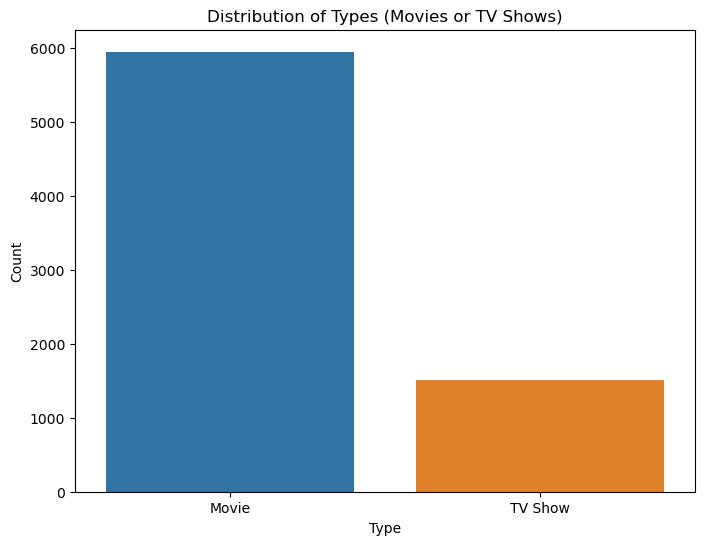

In [42]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='type')
plt.title('Distribution of Types (Movies or TV Shows)')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

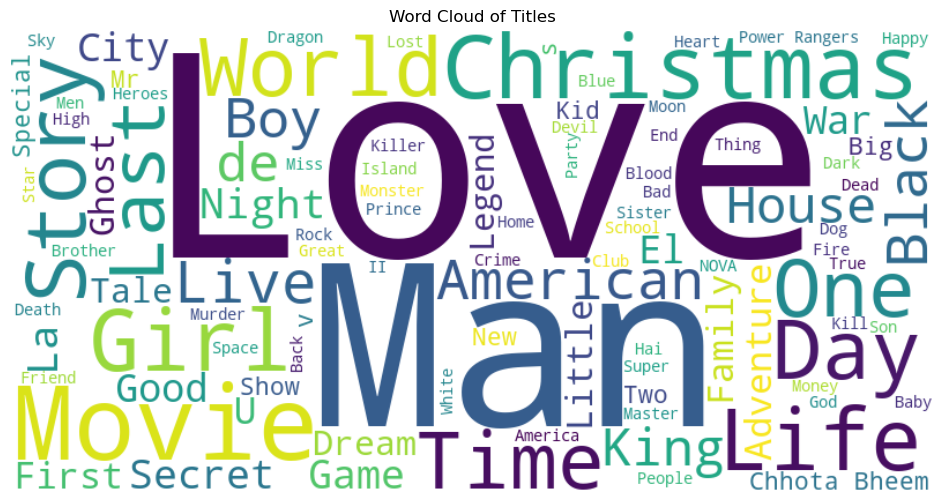

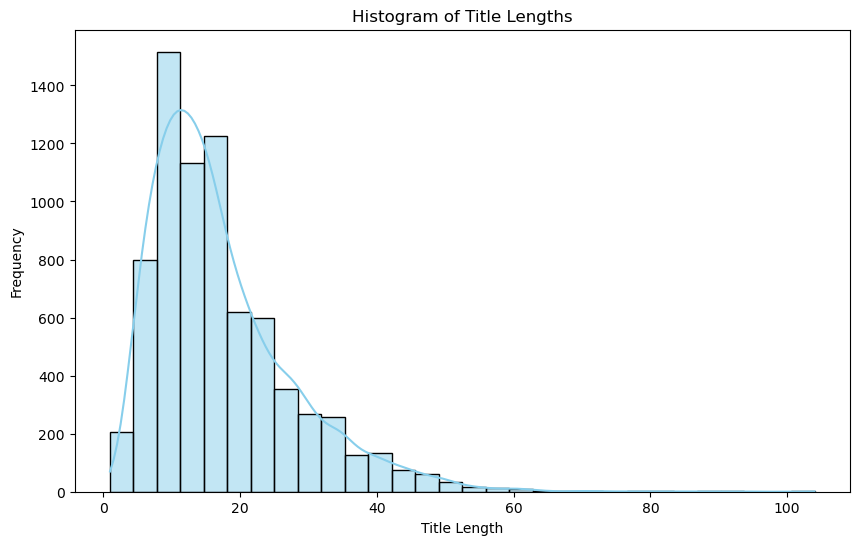

In [43]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns

# Word cloud
title_text = ' '.join(df['title'].dropna().astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100, colormap='viridis').generate(title_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Titles')
plt.axis('off')
plt.show()

# Histogram of title lengths
df['title_length'] = df['title'].str.len()
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='title_length', bins=30, kde=True, color='skyblue')
plt.title('Histogram of Title Lengths')
plt.xlabel('Title Length')
plt.ylabel('Frequency')
plt.show()


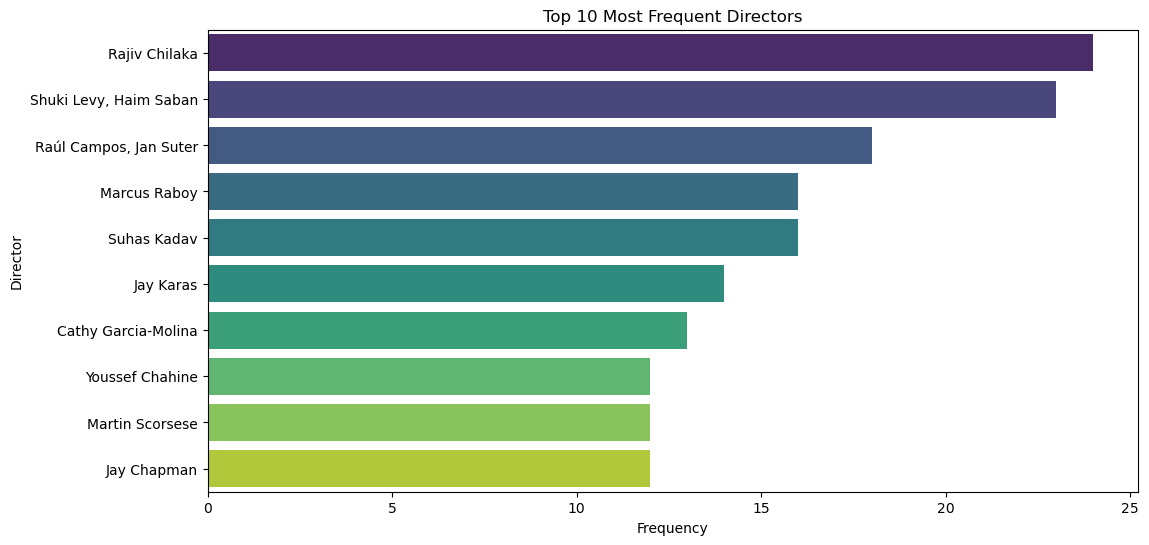

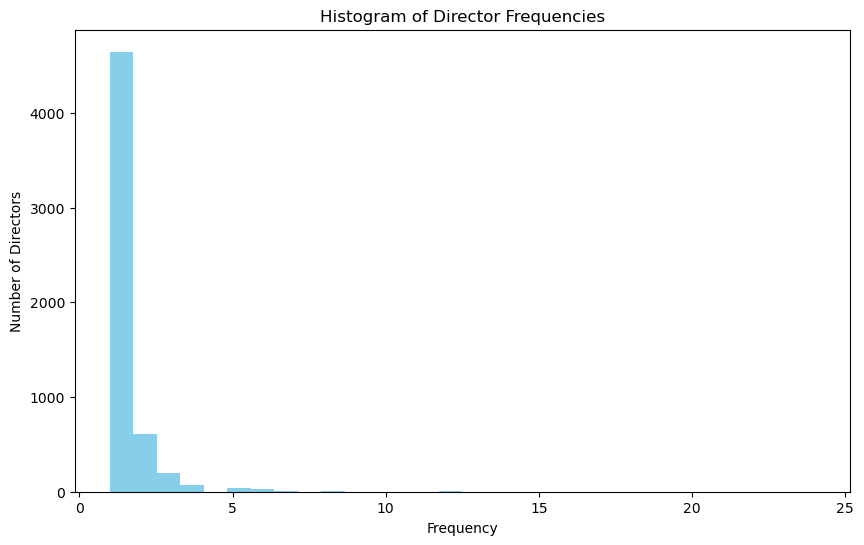

In [44]:
# Count plot of director frequencies
plt.figure(figsize=(12, 6))
sns.countplot(data=df, y='director', order=df['director'].value_counts().index[:10], palette='viridis')
plt.title('Top 10 Most Frequent Directors')
plt.xlabel('Frequency')
plt.ylabel('Director')
plt.show()

# Histogram of director frequencies
plt.figure(figsize=(10, 6))
df['director'].value_counts().plot(kind='hist', bins=30, color='skyblue')
plt.title('Histogram of Director Frequencies')
plt.xlabel('Frequency')
plt.ylabel('Number of Directors')
plt.show()

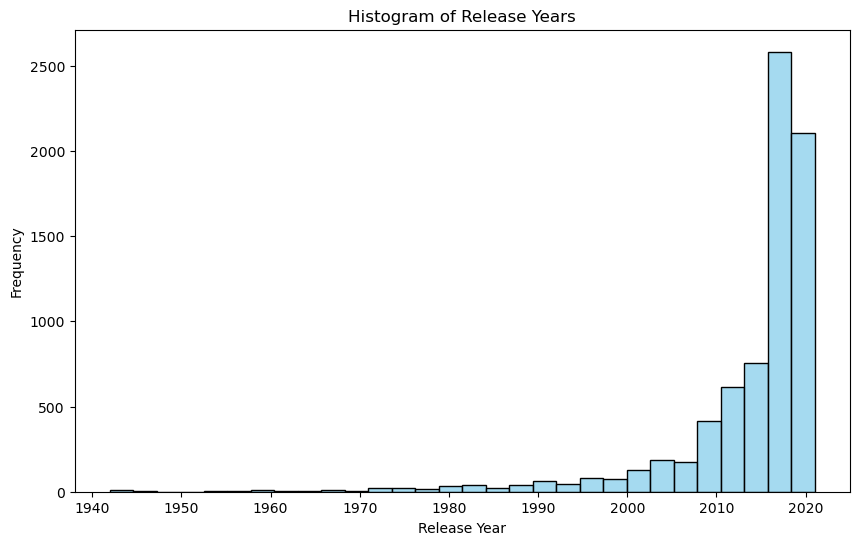

In [45]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='release_year', bins=30, kde=False, color='skyblue')
plt.title('Histogram of Release Years')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()

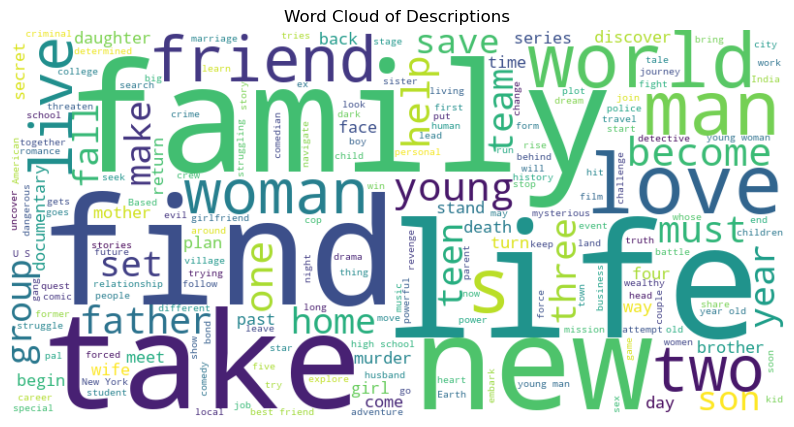

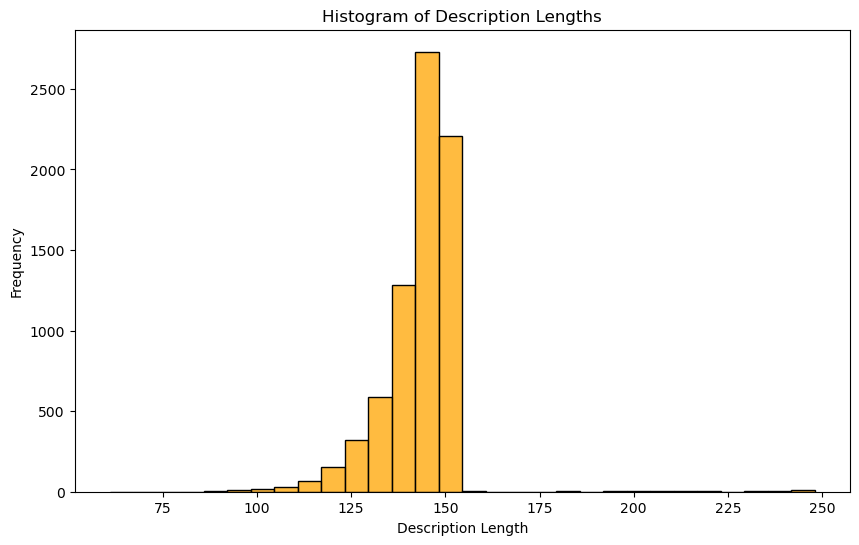

In [46]:
text = ' '.join(df['description'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Descriptions')
plt.axis('off')
plt.show()

# Histogram of description lengths
plt.figure(figsize=(10, 6))
sns.histplot(data=df.dropna(), x=df['description'].str.len(), bins=30, kde=False, color='orange')
plt.title('Histogram of Description Lengths')
plt.xlabel('Description Length')
plt.ylabel('Frequency')
plt.show()

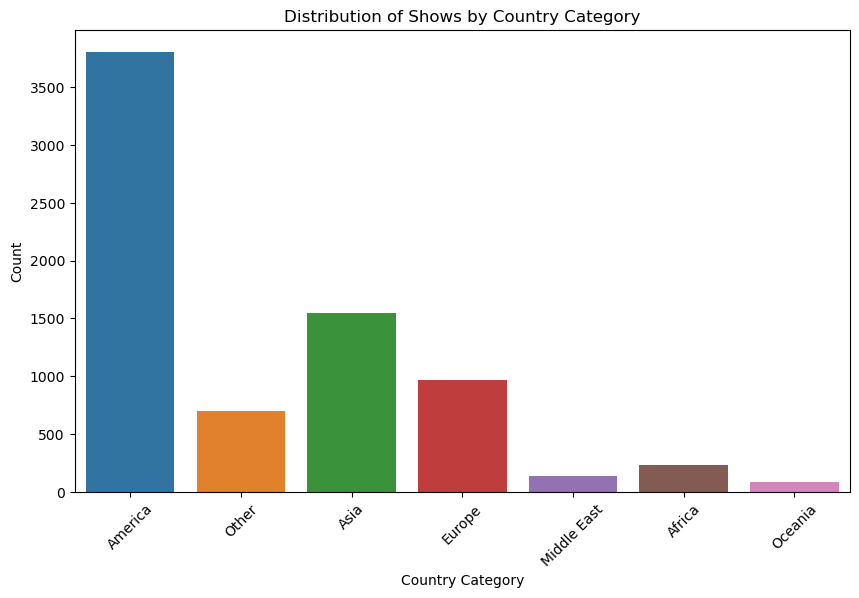

In [47]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='country_category')
plt.title('Distribution of Shows by Country Category')
plt.xlabel('Country Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

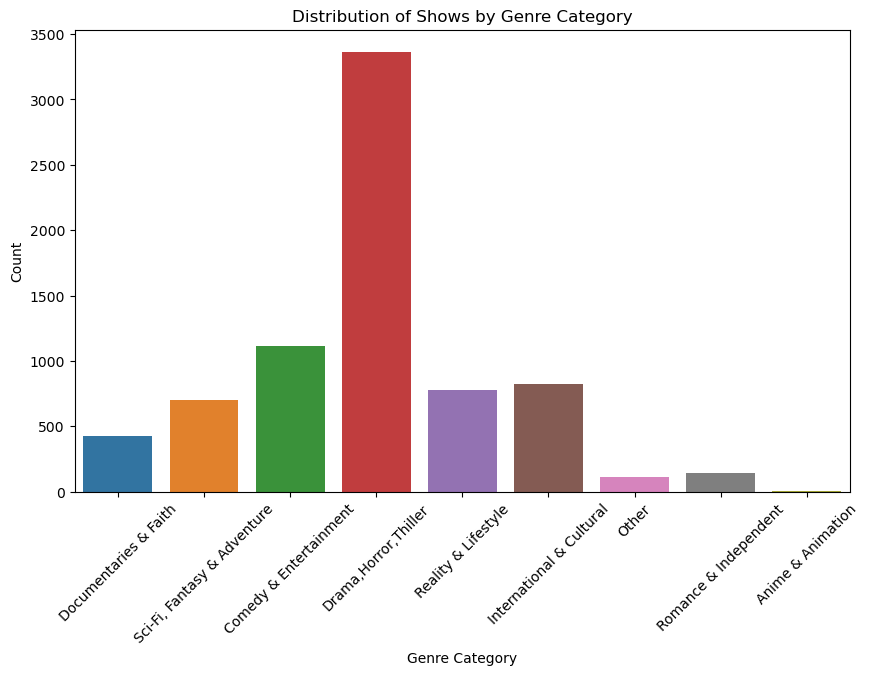

In [48]:
# Count plot of genre categories
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='genre_category')
plt.title('Distribution of Shows by Genre Category')
plt.xlabel('Genre Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

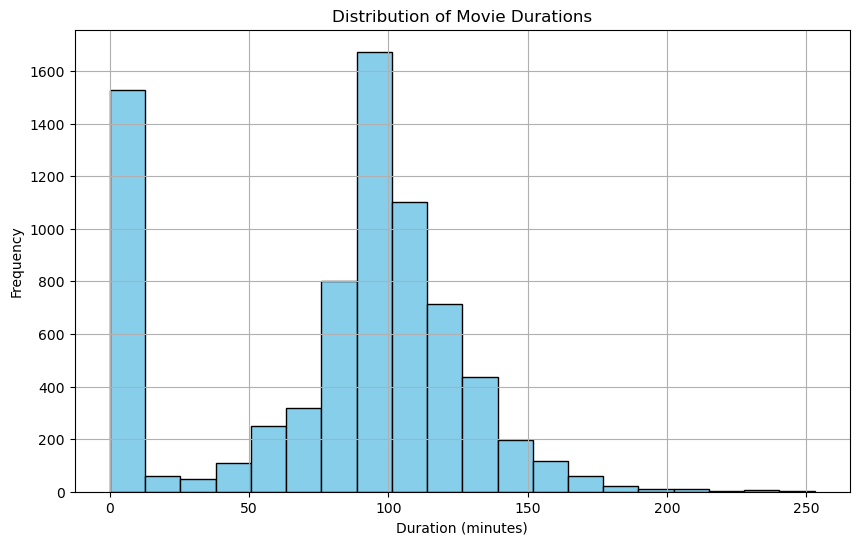

In [49]:
# Histogram of movie durations
plt.figure(figsize=(10, 6))
plt.hist(df['Movie Duration'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

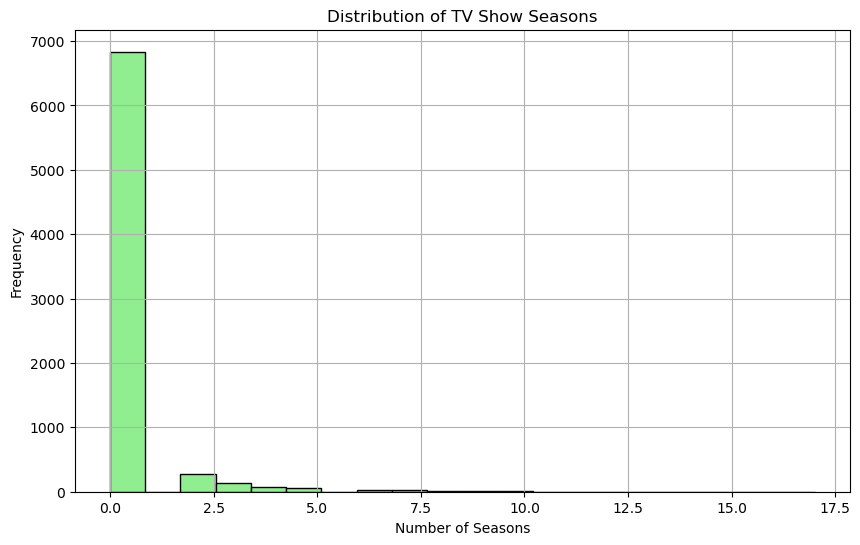

In [50]:
plt.figure(figsize=(10, 6))
plt.hist(df['TV Show Seasons'].dropna(), bins=20, color='lightgreen', edgecolor='black')
plt.title('Distribution of TV Show Seasons')
plt.xlabel('Number of Seasons')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

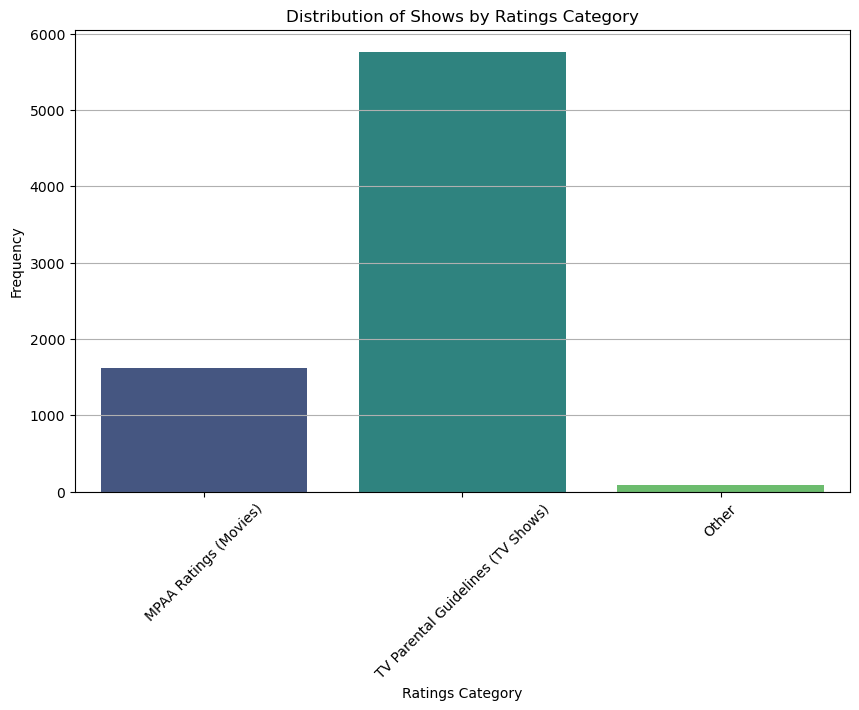

In [51]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='ratings_category', palette='viridis')
plt.title('Distribution of Shows by Ratings Category')
plt.xlabel('Ratings Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

# BIVARIATE ANALYSIS

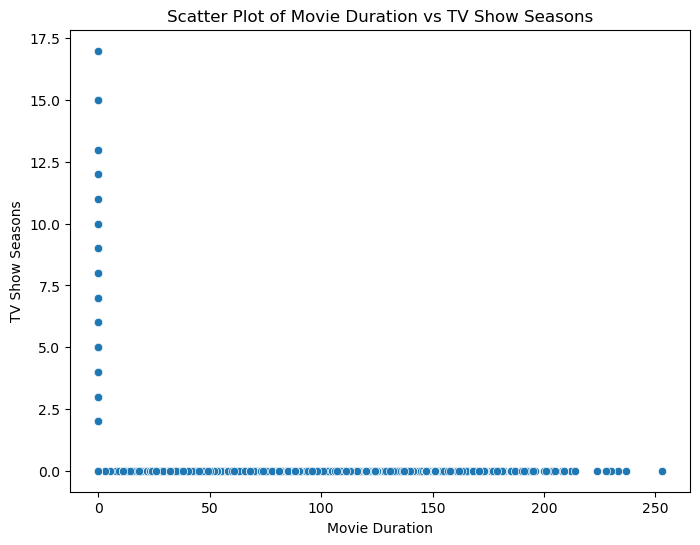

In [52]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Movie Duration', y='TV Show Seasons')
plt.title('Scatter Plot of Movie Duration vs TV Show Seasons')
plt.xlabel('Movie Duration')
plt.ylabel('TV Show Seasons')
plt.show()

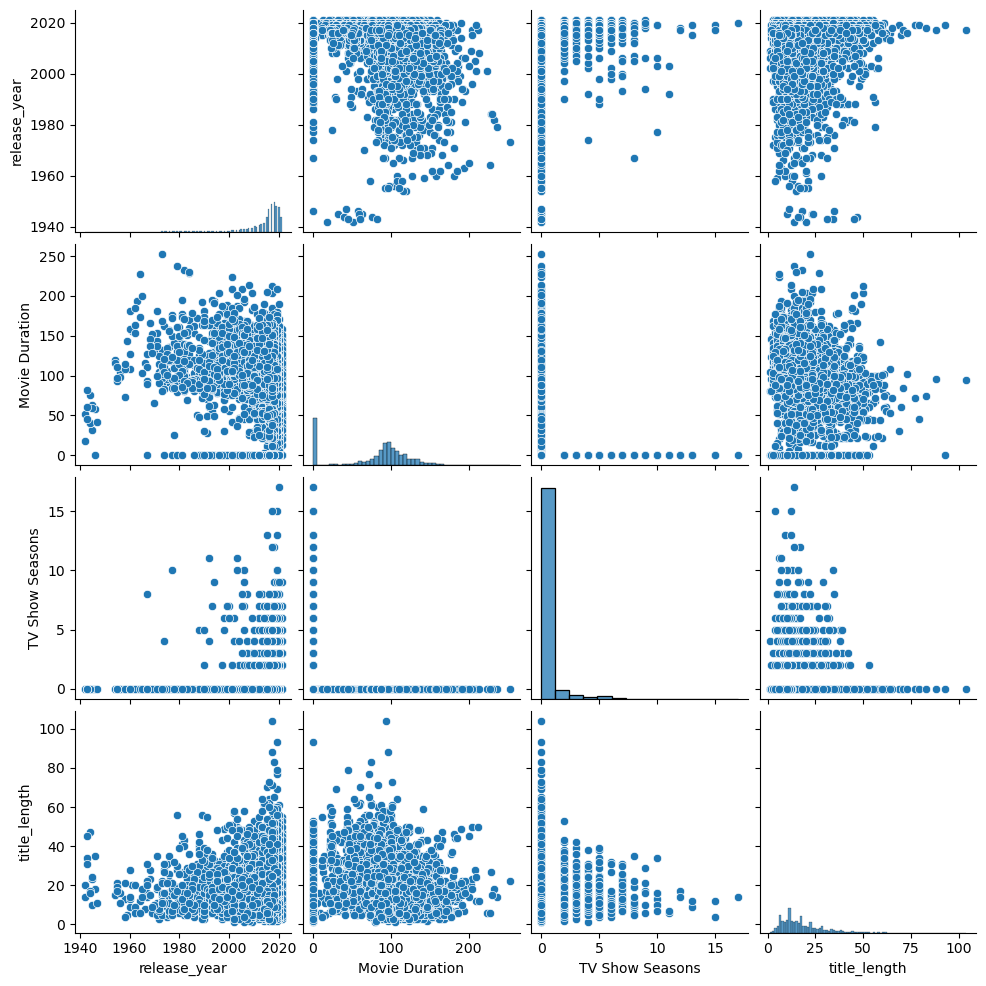

In [53]:
sns.pairplot(df)

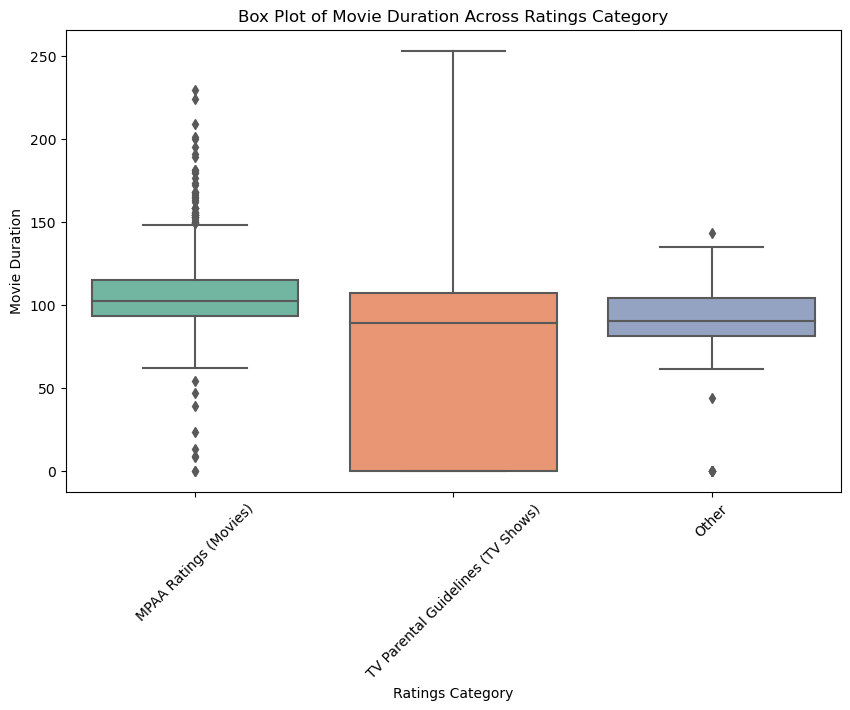

In [54]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='ratings_category', y='Movie Duration', palette='Set2')
plt.title('Box Plot of Movie Duration Across Ratings Category')
plt.xlabel('Ratings Category')
plt.ylabel('Movie Duration')
plt.xticks(rotation=45)
plt.show()

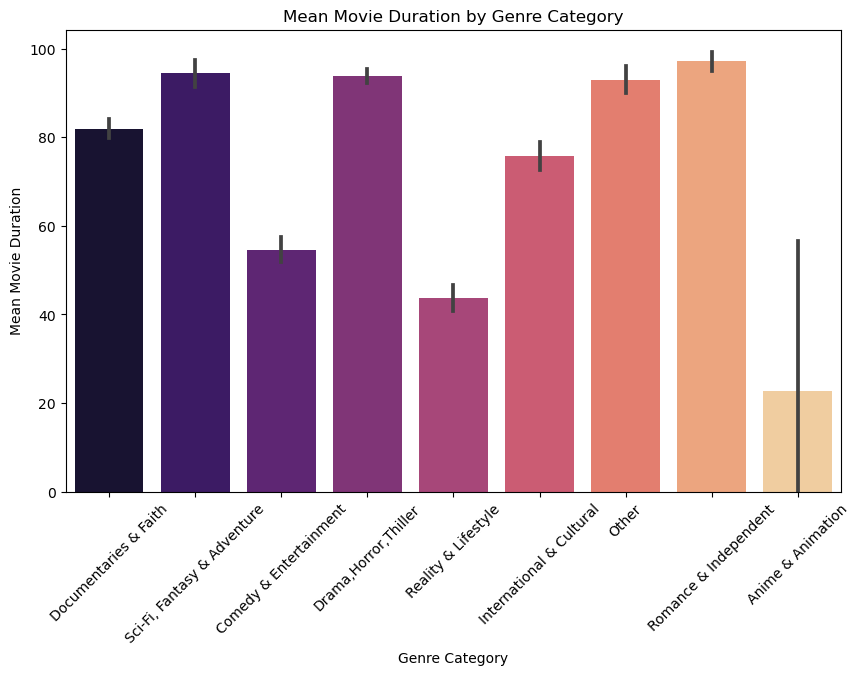

In [55]:
import numpy as np
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='genre_category', y='Movie Duration', estimator=np.mean, palette='magma')
plt.title('Mean Movie Duration by Genre Category')
plt.xlabel('Genre Category')
plt.ylabel('Mean Movie Duration')
plt.xticks(rotation=45)
plt.show()

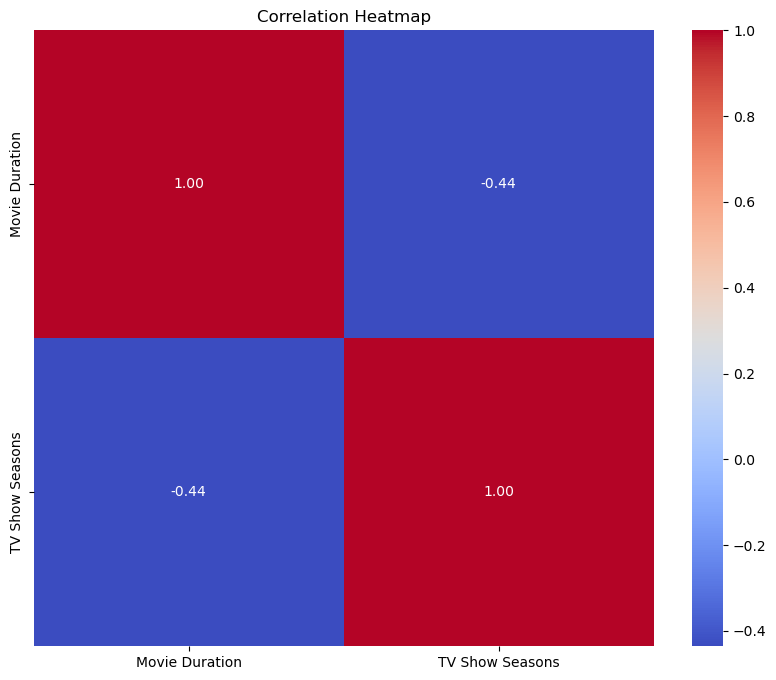

In [56]:
# Heatmap of correlation between numerical variables
plt.figure(figsize=(10, 8))
sns.heatmap(df[['Movie Duration', 'TV Show Seasons']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

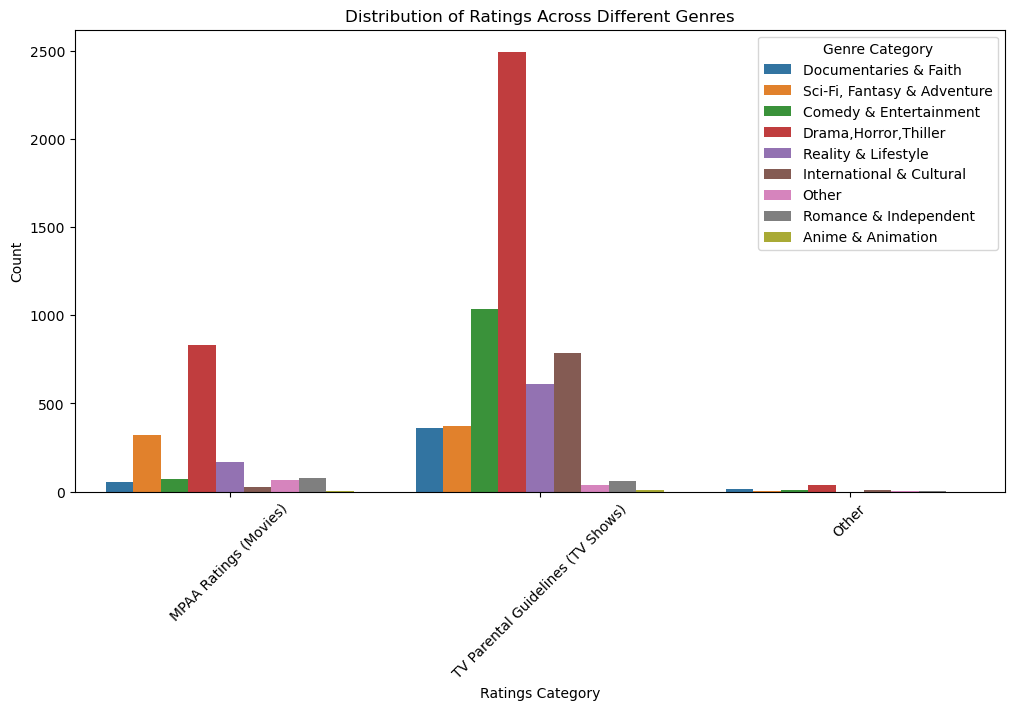

In [57]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='ratings_category', hue='genre_category')
plt.title('Distribution of Ratings Across Different Genres')
plt.xlabel('Ratings Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Genre Category')
plt.show()

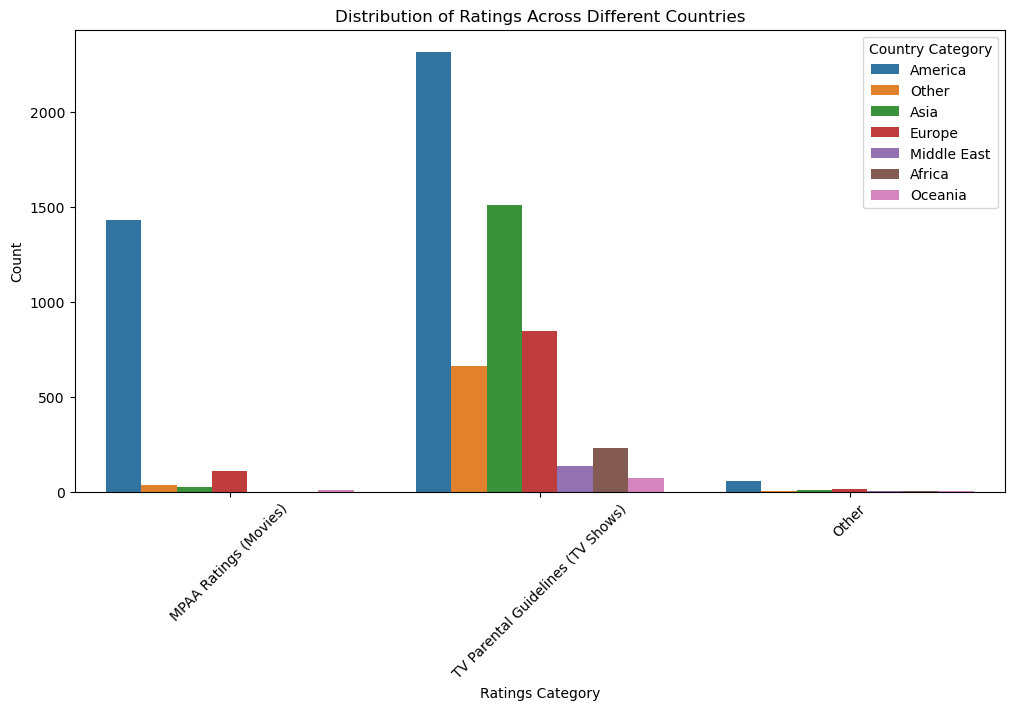

In [58]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='ratings_category', hue='country_category')
plt.title('Distribution of Ratings Across Different Countries')
plt.xlabel('Ratings Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Country Category')
plt.show()

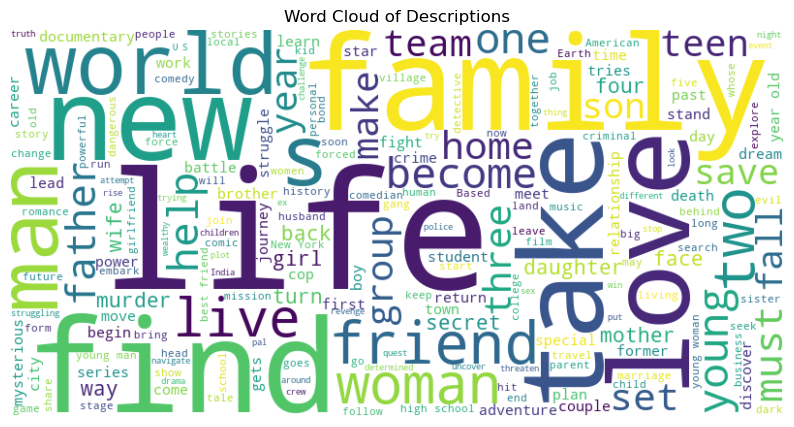

In [59]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all descriptions into a single string
all_descriptions = ' '.join(df['description'].dropna())

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_descriptions)

# Display the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Descriptions')
plt.axis('off')
plt.show()

In [60]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Initialize CountVectorizer to convert text into a matrix of token counts
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')

# Fit and transform the text data
dtm = vectorizer.fit_transform(df['description'].dropna())

# Initialize LDA with the number of topics
num_topics = 5
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)

# Fit LDA to the document-term matrix
lda.fit(dtm)

# Print top words for each topic
for index, topic in enumerate(lda.components_):
    print(f"TOP 10 WORDS FOR TOPIC {index}")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print('\n')

TOP 10 WORDS FOR TOPIC 0
['love', 'year', 'family', 'home', 'school', 'new', 'woman', 'young', 'old', 'life']


TOP 10 WORDS FOR TOPIC 1
['girl', 'documentary', 'young', 'finds', 'love', 'father', 'new', 'world', 'family', 'life']


TOP 10 WORDS FOR TOPIC 2
['friends', 'woman', 'fight', 'man', 'family', 'world', 'city', 'save', 'young', 'new']


TOP 10 WORDS FOR TOPIC 3
['world', 'agent', 'cop', 'life', 'group', 'police', 'murder', 'woman', 'young', 'man']


TOP 10 WORDS FOR TOPIC 4
['young', 'friend', 'story', 'love', 'best', 'film', 'man', 'family', 'life', 'friends']




**Topic 0 :**


*   Keywords: death, world, police, crime, murder, life, young, man
*   Theme: Crime and suspense, possibly involving investigations, murders, and the complexities of life.

**Topic 1:**


*   Keywords: star, love, stories, comedy, friends, series, family, documentary.
*  Theme: Entertainment and relationships, including romantic comedies, family dramas, and documentary series.

**Topic 2:**


*   Keywords: city, high, love, young, documentary, school, friends, life
*   Theme: Urban life and coming-of-age stories, possibly set in high schools or cities, with a focus on young characters and their experiences.

**Topic 3:**


*   Keywords: town, mother, love, home, family, woman, life, young
*   Theme: Family and relationships, revolving around homes and towns, with a focus on familial bonds and life experiences

**Topic 4:**


*   Keywords: friends, friend, help, old, save, group, father, love, world
*   Theme: Friendship and support, featuring stories of camaraderie, assistance, and navigating life's challenges together.








In [61]:
df['release_year'].unique()

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2002, 2003, 2004, 2011, 2008, 2009,
       2007, 2005, 2006, 1994, 2015, 2019, 1982, 1989, 2014, 1990, 1991,
       1999, 2016, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1954, 1979, 1958, 1956, 1963, 1970,
       1973, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967, 1968, 1965,
       1945, 1946, 1942, 1955, 1944, 1947, 1943], dtype=int64)

In [62]:
# Categorize release years starting with '19' and '20'
df['release_year_category'] = df['release_year'].apply(lambda x: '19XX' if str(x).startswith('19') else '20XX')

In [63]:
df.head()

,show_id,type,title,director,date_added,release_year,description,country_category,genre_category,Movie Duration,TV Show Seasons,ratings_category,title_length,release_year_category
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,"September 25, 2021",2020,"As her father nears the end of his life, filmm...",America,Documentaries & Faith,90.0,0.0,MPAA Ratings (Movies),20,20XX
2,s3,TV Show,Ganglands,Julien Leclercq,"September 24, 2021",2021,To protect his family from a powerful drug lor...,Other,"Sci-Fi, Fantasy & Adventure",0.0,0.0,TV Parental Guidelines (TV Shows),9,20XX
4,s5,TV Show,Kota Factory,Saurabh Khanna,"September 24, 2021",2021,In a city of coaching centers known to train I...,Asia,Comedy & Entertainment,0.0,2.0,TV Parental Guidelines (TV Shows),12,20XX
5,s6,TV Show,Midnight Mass,Mike Flanagan,"September 24, 2021",2021,The arrival of a charismatic young priest brin...,Other,"Drama,Horror,Thiller",0.0,0.0,TV Parental Guidelines (TV Shows),13,20XX
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","September 24, 2021",2021,Equestria's divided. But a bright-eyed hero be...,Other,Reality & Lifestyle,91.0,0.0,MPAA Ratings (Movies),32,20XX


In [64]:
df['release_year_category'].unique()

array(['20XX', '19XX'], dtype=object)

In [65]:
mapping = {'20XX': 0, '19XX': 1}

# Map values
df['release_year_category'] = df['release_year_category'].map(mapping)

In [66]:
df['release_year_category'].unique()

array([0, 1], dtype=int64)

In [67]:
df = df.drop(['show_id','title','director','release_year'], axis=1)

In [68]:
df.head()

,type,date_added,description,country_category,genre_category,Movie Duration,TV Show Seasons,ratings_category,title_length,release_year_category
0,Movie,"September 25, 2021","As her father nears the end of his life, filmm...",America,Documentaries & Faith,90.0,0.0,MPAA Ratings (Movies),20,0
2,TV Show,"September 24, 2021",To protect his family from a powerful drug lor...,Other,"Sci-Fi, Fantasy & Adventure",0.0,0.0,TV Parental Guidelines (TV Shows),9,0
4,TV Show,"September 24, 2021",In a city of coaching centers known to train I...,Asia,Comedy & Entertainment,0.0,2.0,TV Parental Guidelines (TV Shows),12,0
5,TV Show,"September 24, 2021",The arrival of a charismatic young priest brin...,Other,"Drama,Horror,Thiller",0.0,0.0,TV Parental Guidelines (TV Shows),13,0
6,Movie,"September 24, 2021",Equestria's divided. But a bright-eyed hero be...,Other,Reality & Lifestyle,91.0,0.0,MPAA Ratings (Movies),32,0


In [69]:
df['genre_category'].unique()

array(['Documentaries & Faith', 'Sci-Fi, Fantasy & Adventure',
       'Comedy & Entertainment', 'Drama,Horror,Thiller',
       'Reality & Lifestyle', 'International & Cultural', 'Other',
       'Romance & Independent', 'Anime & Animation'], dtype=object)

In [70]:
df = pd.get_dummies(df, columns=['type'], drop_first=True)

In [71]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the column to encode
df['country_category'] = label_encoder.fit_transform(df['country_category'])

In [72]:
df['genre_category'] = label_encoder.fit_transform(df['genre_category'])

In [73]:
df['ratings_category'] = label_encoder.fit_transform(df['ratings_category'])

In [74]:
df.head()

,date_added,description,country_category,genre_category,Movie Duration,TV Show Seasons,ratings_category,title_length,release_year_category,type_TV Show
0,"September 25, 2021","As her father nears the end of his life, filmm...",1,2,90.0,0.0,0,20,0,0
2,"September 24, 2021",To protect his family from a powerful drug lor...,6,8,0.0,0.0,2,9,0,1
4,"September 24, 2021",In a city of coaching centers known to train I...,2,1,0.0,2.0,2,12,0,1
5,"September 24, 2021",The arrival of a charismatic young priest brin...,6,3,0.0,0.0,2,13,0,1
6,"September 24, 2021",Equestria's divided. But a bright-eyed hero be...,6,6,91.0,0.0,0,32,0,0


In [75]:
df1 = df.drop('description', axis=1)

In [76]:
df1 = df1.drop('date_added', axis=1)

In [77]:
df1.head()

,country_category,genre_category,Movie Duration,TV Show Seasons,ratings_category,title_length,release_year_category,type_TV Show
0,1,2,90.0,0.0,0,20,0,0
2,6,8,0.0,0.0,2,9,0,1
4,2,1,0.0,2.0,2,12,0,1
5,6,3,0.0,0.0,2,13,0,1
6,6,6,91.0,0.0,0,32,0,0


In [78]:
df1['ratings_category'].value_counts()

2    5764
0    1614
1      87
Name: ratings_category, dtype: int64

In [79]:
df1.corr()

,country_category,genre_category,Movie Duration,TV Show Seasons,ratings_category,title_length,release_year_category,type_TV Show
country_category,1.000000,-0.004899,-0.061772,-0.058938,0.242607,0.051922,-0.021612,0.068727
genre_category,-0.004899,1.000000,0.045006,-0.052555,-0.215505,0.008626,0.084905,-0.034349
Movie Duration,-0.061772,0.045006,1.000000,-0.435750,-0.280493,-0.073057,0.159300,-0.855168
TV Show Seasons,-0.058938,-0.052555,-0.435750,1.000000,0.136218,-0.071366,-0.026364,0.509549
ratings_category,0.242607,-0.215505,-0.280493,0.136218,1.000000,0.064778,-0.175469,0.268127
title_length,0.051922,0.008626,-0.073057,-0.071366,0.064778,1.000000,-0.011590,-0.079231
release_year_category,-0.021612,0.084905,0.159300,-0.026364,-0.175469,-0.011590,1.000000,-0.094378
type_TV Show,0.068727,-0.034349,-0.855168,0.509549,0.268127,-0.079231,-0.094378,1.000000


# Clustering Implementation

# K-Means

In [80]:
from sklearn.cluster import KMeans

In [81]:
#Standardization
from sklearn.preprocessing import StandardScaler

In [82]:
sc = StandardScaler()

In [83]:
x = sc.fit_transform(df1)
x

array([[-6.42520867e-01, -8.16687039e-01,  2.09162240e-01, ...,
         2.64937462e-01, -2.68792399e-01, -5.04391736e-01],
       [ 2.56321251e+00,  2.18162546e+00, -1.69544391e+00, ...,
        -7.92430203e-01, -2.68792399e-01,  1.98258601e+00],
       [-1.37419247e-03, -1.31640579e+00, -1.69544391e+00, ...,
        -5.04057203e-01, -2.68792399e-01,  1.98258601e+00],
       ...,
       [-6.42520867e-01, -3.16968289e-01,  1.66837659e-01, ...,
        -6.96305869e-01, -2.68792399e-01, -5.04391736e-01],
       [-6.42520867e-01,  1.18218796e+00,  1.66837659e-01, ...,
        -1.27305187e+00, -2.68792399e-01, -5.04391736e-01],
       [-1.37419247e-03, -1.31640579e+00,  6.53570340e-01, ...,
        -1.08080320e+00, -2.68792399e-01, -5.04391736e-01]])

In [84]:
km = KMeans()

In [85]:
wcss = []
for i in range(1,31):
    km = KMeans(n_clusters = i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

In [86]:
wcss

[59720.00000000003,
 44163.44510047935,
 36320.18228209433,
 30213.882323558777,
 26544.127504911216,
 23001.056157870673,
 20121.748636103683,
 18405.698236951,
 17170.872397039908,
 15954.593698509532,
 15324.544950629628,
 14461.883002255607,
 13634.887889152873,
 12797.562429082967,
 12116.322492466232,
 11814.41610967616,
 11274.432293017362,
 10934.219453414447,
 10700.147999458874,
 10238.855870652005,
 9974.126088689234,
 9722.905697944881,
 9385.387996390762,
 9123.616307902172,
 8875.31474639789,
 8610.070392852136,
 8322.572827360724,
 8176.241778609626,
 8066.2514065478035,
 7918.7956199129585]

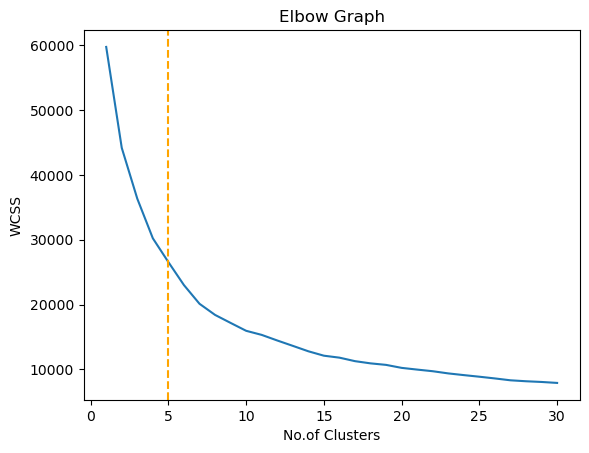

In [87]:
plt.plot(range(1,31),wcss)
plt.xlabel('No.of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Graph')
plt.axvline(x=5,linestyle = '--' , color = 'Orange')

In [88]:
km = KMeans(n_clusters = 5)
ypred = km.fit_predict(x)

In [89]:
ypred

array([4, 1, 1, ..., 4, 4, 0])

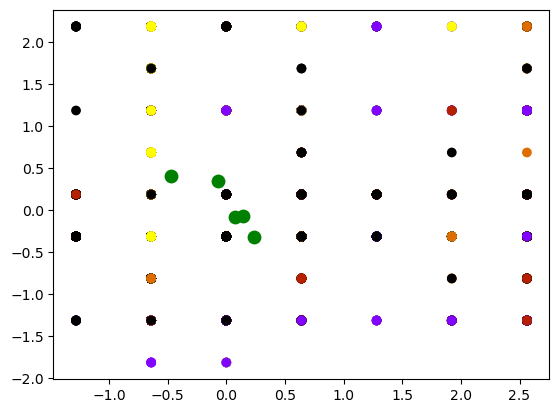

In [90]:
#Visualisation
plt.scatter(x = x[:,0], y = x[:,1] , c = ypred , cmap = 'gnuplot' )
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], c = 'green' , s = 80 )

In [91]:
#Silhouette Score
from sklearn.metrics import silhouette_score

In [92]:
silhouette_score(x,ypred)

0.3246230861807943

In [93]:
#Analyzing the clusters
df1['Cluster'] = ypred

In [94]:
df1

,country_category,genre_category,Movie Duration,TV Show Seasons,ratings_category,title_length,release_year_category,type_TV Show,Cluster
0,1,2,90.0,0.0,0,20,0,0,4
2,6,8,0.0,0.0,2,9,0,1,1
4,2,1,0.0,2.0,2,12,0,1,1
5,6,3,0.0,0.0,2,13,0,1,1
6,6,6,91.0,0.0,0,32,0,0,4
...,...,...,...,...,...,...,...,...,...
8801,4,3,96.0,0.0,2,7,0,0,0
8802,1,3,158.0,0.0,0,6,0,0,4
8804,1,3,88.0,0.0,0,10,0,0,4
8805,1,6,88.0,0.0,0,4,0,0,4


In [95]:
df1.groupby('Cluster').agg('mean')

,country_category,genre_category,Movie Duration,TV Show Seasons,ratings_category,title_length,release_year_category,type_TV Show
Cluster,,,,,,,,
0,2.113485,3.474967,104.330441,0.000000,1.984980,12.829439,0.000000,0.000000
1,2.220648,3.478408,0.000000,1.489879,1.993927,15.150472,0.010121,1.000000
2,2.363233,2.988455,77.829485,0.000000,1.966252,33.972469,0.000000,0.014210
3,1.887295,4.315574,111.444672,0.000000,0.987705,16.795082,1.000000,0.032787
4,1.268026,4.437728,104.495994,0.000000,0.012382,15.576111,0.000000,0.000000


In [96]:
#Checking the shows wrt Clusters
df1[df1['Cluster'] == 0]

,country_category,genre_category,Movie Duration,TV Show Seasons,ratings_category,title_length,release_year_category,type_TV Show,Cluster
12,3,3,127.0,0.0,2,12,0,0,0
18,6,3,94.0,0.0,2,9,0,0,0
30,6,3,111.0,0.0,2,15,0,0,0
36,6,3,105.0,0.0,2,14,0,0,0
64,6,6,103.0,0.0,2,10,0,0,0
...,...,...,...,...,...,...,...,...,...
8794,3,3,98.0,0.0,2,6,0,0,0
8798,2,3,131.0,0.0,2,8,0,0,0
8799,2,3,120.0,0.0,2,5,0,0,0
8801,4,3,96.0,0.0,2,7,0,0,0


In [97]:
df1[df1['Cluster'] == 1]

,country_category,genre_category,Movie Duration,TV Show Seasons,ratings_category,title_length,release_year_category,type_TV Show,Cluster
2,6,8,0.0,0.0,2,9,0,1,1
4,2,1,0.0,2.0,2,12,0,1,1
5,6,3,0.0,0.0,2,13,0,1,1
8,3,6,0.0,9.0,2,29,0,1,1
10,6,6,0.0,0.0,2,35,0,1,1
...,...,...,...,...,...,...,...,...,...
8780,1,6,0.0,0.0,2,12,0,1,1
8783,6,6,0.0,0.0,2,4,0,1,1
8785,6,6,0.0,0.0,2,3,0,1,1
8796,4,3,0.0,2.0,2,10,0,1,1


# DBSCAN

In [98]:
#Finding out best epsilon value 
from sklearn.neighbors import NearestNeighbors

In [99]:
neigh = NearestNeighbors(n_neighbors = 3).fit(x)

In [100]:
neigh

NearestNeighbors(n_neighbors=3)

In [101]:
d,index = neigh.kneighbors(x)

In [102]:
d

array([[0.        , 0.02116229, 0.04232458],
       [0.        , 0.        , 0.09612433],
       [0.        , 0.09612433, 0.19224867],
       ...,
       [0.        , 0.        , 0.02116229],
       [0.        , 0.02116229, 0.09842627],
       [0.        , 0.19685253, 0.21162291]])

In [103]:
distance = np.sort(d[:,1])

In [104]:
distance

array([0.        , 0.        , 0.        , ..., 2.5059789 , 2.88795054,
       3.81298749])

Text(0.5, 1.0, 'K-Distance Graph')

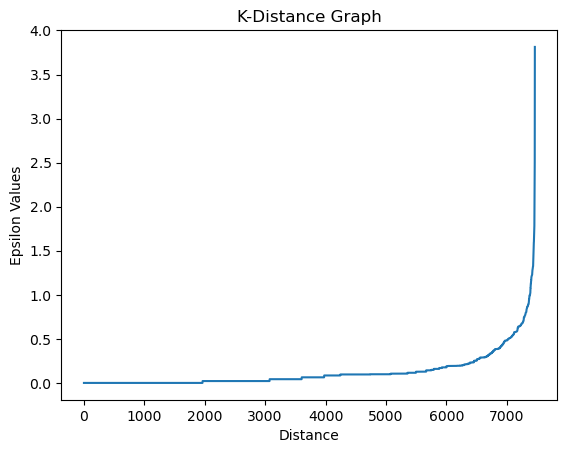

In [105]:
plt.plot(distance)
plt.xlabel('Distance')
plt.ylabel('Epsilon Values')
plt.title('K-Distance Graph')

In [106]:
# Model Building
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.6, min_samples = 3)
y = db.fit_predict(x)

In [107]:
y

array([ 0,  1,  2, ...,  0,  0, 32], dtype=int64)

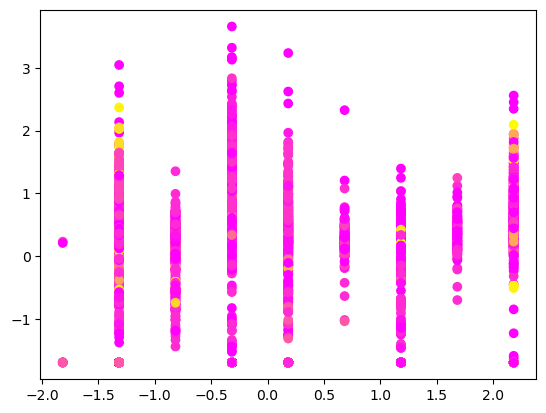

In [108]:
plt.scatter(x[:,1] , x[:,2], c = y , cmap = 'spring')

In [109]:
silhouette_score(x,y)

-0.06072672164397854

In [110]:
df1['Cluster2'] = y

In [111]:
df1

,country_category,genre_category,Movie Duration,TV Show Seasons,ratings_category,title_length,release_year_category,type_TV Show,Cluster,Cluster2
0,1,2,90.0,0.0,0,20,0,0,4,0
2,6,8,0.0,0.0,2,9,0,1,1,1
4,2,1,0.0,2.0,2,12,0,1,1,2
5,6,3,0.0,0.0,2,13,0,1,1,3
6,6,6,91.0,0.0,0,32,0,0,4,-1
...,...,...,...,...,...,...,...,...,...,...
8801,4,3,96.0,0.0,2,7,0,0,0,52
8802,1,3,158.0,0.0,0,6,0,0,4,0
8804,1,3,88.0,0.0,0,10,0,0,4,0
8805,1,6,88.0,0.0,0,4,0,0,4,0


In [112]:
df1.groupby('Cluster2').agg('mean')

,country_category,genre_category,Movie Duration,TV Show Seasons,ratings_category,title_length,release_year_category,type_TV Show,Cluster
Cluster2,,,,,,,,,
-1,2.710214,3.969121,57.995249,1.565321,1.551069,24.959620,0.258907,0.4038,1.847981
0,1.000000,4.476910,104.024349,0.000000,0.000000,15.643997,0.000000,0.0000,3.998321
1,6.000000,8.000000,0.000000,0.000000,2.000000,11.500000,0.000000,1.0000,1.000000
2,2.000000,1.000000,0.000000,2.000000,2.000000,15.250000,0.000000,1.0000,1.000000
3,6.000000,3.312500,0.000000,0.000000,2.000000,12.453125,0.000000,1.0000,1.000000
...,...,...,...,...,...,...,...,...,...
119,6.000000,8.000000,90.000000,0.000000,2.000000,29.666667,0.000000,0.0000,2.000000
120,1.000000,8.000000,155.333333,0.000000,0.000000,38.666667,0.000000,0.0000,4.000000
121,1.000000,3.333333,119.333333,0.000000,1.000000,21.333333,0.000000,0.0000,4.000000


In [113]:
df1[df1['Cluster2'] == 0]

,country_category,genre_category,Movie Duration,TV Show Seasons,ratings_category,title_length,release_year_category,type_TV Show,Cluster,Cluster2
0,1,2,90.0,0.0,0,20,0,0,4,0
9,1,3,104.0,0.0,0,12,0,0,4,0
27,1,5,103.0,0.0,0,9,0,0,4,0
28,1,3,97.0,0.0,0,10,0,0,4,0
29,1,3,106.0,0.0,0,8,0,0,4,0
...,...,...,...,...,...,...,...,...,...,...
8791,1,3,94.0,0.0,0,11,0,0,4,0
8793,1,6,88.0,0.0,0,20,0,0,4,0
8802,1,3,158.0,0.0,0,6,0,0,4,0
8804,1,3,88.0,0.0,0,10,0,0,4,0


In [114]:
df1[df1['Cluster2'] == 1]

,country_category,genre_category,Movie Duration,TV Show Seasons,ratings_category,title_length,release_year_category,type_TV Show,Cluster,Cluster2
2,6,8,0.0,0.0,2,9,0,1,1,1
11,6,8,0.0,0.0,2,16,0,1,1,1
19,6,8,0.0,0.0,2,6,0,1,1,1
4627,6,8,0.0,0.0,2,10,0,1,1,1
5194,6,8,0.0,0.0,2,9,0,1,1,1
7209,6,8,0.0,0.0,2,19,0,1,1,1


# Hierarchial Clustering

In [115]:
from scipy.cluster import hierarchy

In [116]:
lk = hierarchy.linkage(x,method = 'single')

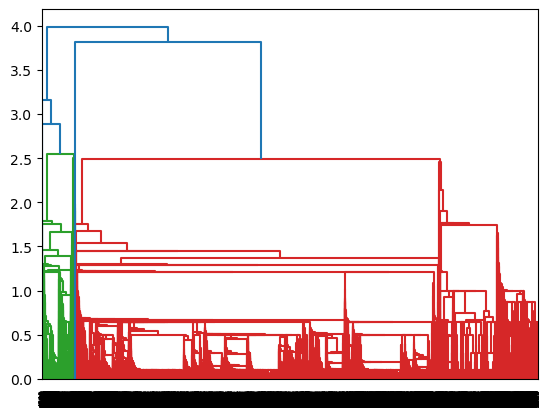

In [117]:
dendrogram = hierarchy.dendrogram(lk)

In [118]:
lk = hierarchy.linkage(x,method = 'complete')

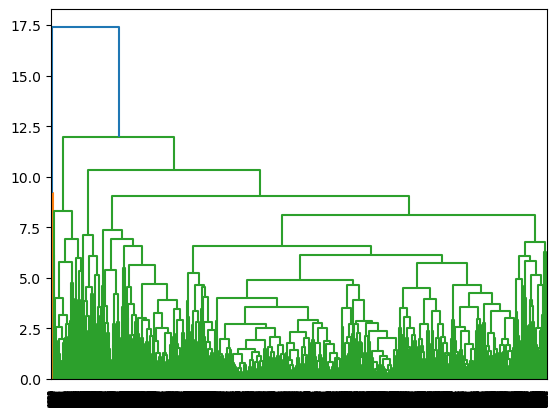

In [124]:
dendrogram = hierarchy.dendrogram(lk)

In [125]:
# Model Building
from sklearn.cluster import AgglomerativeClustering

In [126]:
hc = AgglomerativeClustering(n_clusters = 2)

In [127]:
ypred = hc.fit_predict(x)

In [128]:
df1['Clusters3'] = ypred

In [129]:
df1

,country_category,genre_category,Movie Duration,TV Show Seasons,ratings_category,title_length,release_year_category,type_TV Show,Cluster,Cluster2,Clusters3
0,1,2,90.0,0.0,0,20,0,0,4,0,0
2,6,8,0.0,0.0,2,9,0,1,1,1,1
4,2,1,0.0,2.0,2,12,0,1,1,2,1
5,6,3,0.0,0.0,2,13,0,1,1,3,1
6,6,6,91.0,0.0,0,32,0,0,4,-1,0
...,...,...,...,...,...,...,...,...,...,...,...
8801,4,3,96.0,0.0,2,7,0,0,0,52,0
8802,1,3,158.0,0.0,0,6,0,0,4,0,0
8804,1,3,88.0,0.0,0,10,0,0,4,0,0
8805,1,6,88.0,0.0,0,4,0,0,4,0,0


In [130]:
df1.groupby('Clusters3').agg('mean')

,country_category,genre_category,Movie Duration,TV Show Seasons,ratings_category,title_length,release_year_category,type_TV Show,Cluster,Cluster2
Clusters3,,,,,,,,,,
0,1.947236,3.671189,100.178894,0.000670,1.446231,17.684590,0.082077,0.003183,1.537688,17.748409
1,2.221405,3.486957,0.000000,1.474247,1.993980,15.483612,0.008696,1.000000,1.010033,30.055518


In [131]:
hc = AgglomerativeClustering(n_clusters = 4)
yp = hc.fit_predict(x)

In [132]:
yp

array([1, 0, 0, ..., 1, 1, 2], dtype=int64)

In [133]:
df1['Cluster4'] = yp

In [134]:
df1.groupby('Cluster4').agg('mean')

,country_category,genre_category,Movie Duration,TV Show Seasons,ratings_category,title_length,release_year_category,type_TV Show,Cluster,Cluster2,Clusters3
Cluster4,,,,,,,,,,,
0,2.221405,3.486957,0.000000,1.474247,1.993980,15.483612,0.008696,1.000000,1.010033,30.055518,1.0
1,1.185238,4.346345,103.848119,0.000000,0.051810,15.760823,0.000000,0.000000,3.842441,7.925479,0.0
2,2.218620,3.361091,97.607713,0.000000,1.983542,18.458610,0.000000,0.000246,0.564972,19.572341,0.0
3,1.883673,4.306122,110.989796,0.008163,0.991837,16.785714,1.000000,0.036735,2.991837,30.840816,0.0


In [135]:
df1[df1['Cluster4'] == 0]

,country_category,genre_category,Movie Duration,TV Show Seasons,ratings_category,title_length,release_year_category,type_TV Show,Cluster,Cluster2,Clusters3,Cluster4
2,6,8,0.0,0.0,2,9,0,1,1,1,1,0
4,2,1,0.0,2.0,2,12,0,1,1,2,1,0
5,6,3,0.0,0.0,2,13,0,1,1,3,1,0
8,3,6,0.0,9.0,2,29,0,1,1,-1,1,0
10,6,6,0.0,0.0,2,35,0,1,1,4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
8780,1,6,0.0,0.0,2,12,0,1,1,28,1,0
8783,6,6,0.0,0.0,2,4,0,1,1,4,1,0
8785,6,6,0.0,0.0,2,3,0,1,1,4,1,0
8796,4,3,0.0,2.0,2,10,0,1,1,92,1,0


In [136]:
df1[df1['Cluster4'] == 1]

,country_category,genre_category,Movie Duration,TV Show Seasons,ratings_category,title_length,release_year_category,type_TV Show,Cluster,Cluster2,Clusters3,Cluster4
0,1,2,90.0,0.0,0,20,0,0,4,0,0,1
9,1,3,104.0,0.0,0,12,0,0,4,0,0,1
27,1,5,103.0,0.0,0,9,0,0,4,0,0,1
28,1,3,97.0,0.0,0,10,0,0,4,0,0,1
29,1,3,106.0,0.0,0,8,0,0,4,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
8791,1,3,94.0,0.0,0,11,0,0,4,0,0,1
8793,1,6,88.0,0.0,0,20,0,0,4,0,0,1
8802,1,3,158.0,0.0,0,6,0,0,4,0,0,1
8804,1,3,88.0,0.0,0,10,0,0,4,0,0,1
